In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tqdm import tqdm

from funcs.clean import clean

In [11]:
with open('/Users/zachkeskinen/Documents/temp/modeling/output/v20220210-aspectright_forcedepthmatch/ID1.pro') as f:
    lines = f.readlines()
i = j = k = m = 0
res = pd.DataFrame()
for l in lines:
    if '0500,' in l:
        if i != 0:
            # res = res.append(d, ignore_index= True)
            res = pd.concat([res, pd.DataFrame.from_dict([d])])
        i += 1
        d = {'date':l.replace('0500,','').replace('\n','')}
    if '0501,' in l:
        j += 1
        assert j == i
        d['heights'] = l.replace('0501,','').replace('\n','')
    if '0502,' in l:
        k += 1
        d['densities'] = l.replace('0502,','').replace('\n','')
    if '0521,' in l:
        m += 1
        assert m == k
        d['conductivities'] = l.replace('0521,','').replace('\n','')
res = res[1:]
res = res.set_index('date')

In [13]:
heights = np.linspace(0,140,29)
extracted_temps = pd.DataFrame(columns = heights, index = res.index)
for dt in tqdm(res.index):
    if not pd.isnull(res.loc[dt, 'conductivities']):
        model_heights = np.array([float(x) for x in res.loc[dt, 'heights'].split(',')[1:]])
        conductivities = np.array([float(x) for x in res.loc[dt, 'conductivities'].split(',')[1:]])
        for h in extracted_temps.columns:
            if h < model_heights[-1]+5:
                hdiff = float(h) - model_heights
                idx = (np.abs(hdiff - 0)).argmin()
                extracted_temps.loc[dt, h] = conductivities[idx]

100%|██████████| 4296/4296 [00:07<00:00, 584.09it/s] 


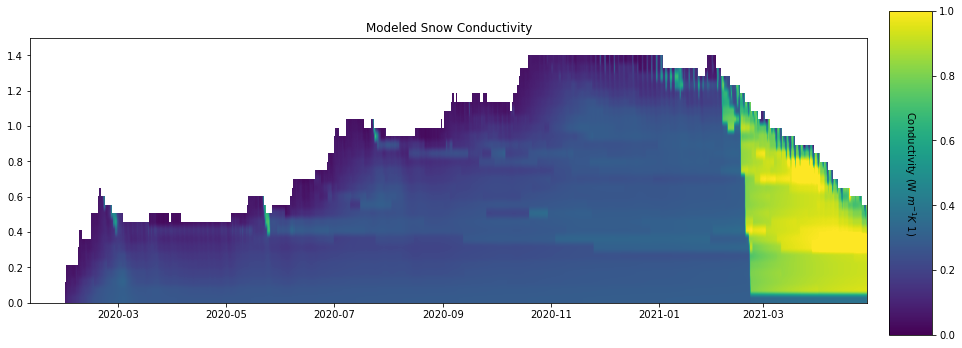

In [14]:
arr = extracted_temps.to_numpy(dtype = float)
arr = np.rot90(arr)
# Create your x-limits. Using two of your unix timestamps you first
# create a list of datetime.datetime objects using map.
x_lims = pd.to_datetime([res.index[0],res.index[-1]])

# You can then convert these datetime.datetime objects to the correct
# format for matplotlib to work with.
x_lims = mdates.date2num(x_lims)

f,ax = plt.subplots(1,1, figsize=(15,15))
sp = plt.imshow(arr, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmin = 0, vmax = 1)
plt.title('Modeled Snow Conductivity')
plt.ylim(0, 1.5)
ax.xaxis_date()

# f.subplots_adjust(right=0.9)
cbar_ax = f.add_axes([0.92, 0.35, 0.04, 0.3])
cbar = f.colorbar(sp, cax=cbar_ax)
cbar.set_label('Conductivity (W $m^{-1} K ^ {1}$)', rotation=270, labelpad=-37)
#plt.savefig(os.path.join(fig_dir, 'meas_model_temp.png'), dpi = 300)

# diffusivity now

In [18]:
specific_heat_ice = 2.09e-3

heights = np.linspace(0,140,29)
extracted_temps = pd.DataFrame(columns = heights, index = res.index)
for dt in tqdm(res.index):
    if not pd.isnull(res.loc[dt, 'conductivities']):
        model_heights = np.array([float(x) for x in res.loc[dt, 'heights'].split(',')[1:]])
        conductivities = np.array([float(x) for x in res.loc[dt, 'conductivities'].split(',')[1:]])
        densities = np.array([float(x) for x in res.loc[dt, 'densities'].split(',')[1:]])
        for h in extracted_temps.columns:
            if h < model_heights[-1]+5:
                hdiff = float(h) - model_heights
                idx = (np.abs(hdiff - 0)).argmin()
                extracted_temps.loc[dt, h] = conductivities[idx]*densities[idx]*specific_heat_ice

  6%|▌         | 253/4296 [00:00<00:01, 2496.59it/s]

79.9
79.9
79.9
79.9
82.5
81.3
81.2
85.1
81.4
81.2
89.7
83.0
84.2
84.2
93.8
84.6
84.2
84.2
97.5
86.2
84.3
84.2
101.7
88.6
84.7
86.0
86.0
105.5
90.8
85.2
86.0
86.0
110.1
91.6
86.5
86.6
87.0
114.2
94.3
87.8
87.2
87.0
118.1
96.9
89.1
87.8
87.0
122.5
100.4
91.3
89.0
83.7
83.7
126.5
103.6
92.1
90.4
83.8
83.8
130.2
106.8
94.1
89.0
83.8
83.8
133.7
112.1
96.2
89.8
83.8
83.8
137.0
115.1
98.3
90.5
83.8
140.0
118.0
100.2
91.2
83.9
142.8
120.7
102.0
91.9
83.9
145.5
123.2
103.7
92.5
83.9
147.9
119.4
105.3
93.1
83.9
150.2
121.4
106.8
93.7
83.9
152.4
123.4
108.2
94.2
83.9
154.4
125.3
109.6
94.7
84.0
156.3
127.0
104.3
95.2
84.0
158.2
128.7
105.3
95.7
84.0
159.9
130.2
106.2
96.2
84.0
161.6
131.7
107.1
96.7
84.0
163.1
133.2
108.0
97.2
84.0
164.7
134.6
108.9
97.7
84.0
166.1
135.9
109.7
98.1
84.1
167.5
137.2
110.5
98.6
84.1
168.9
138.5
111.4
99.1
84.1
170.2
139.7
112.1
99.5
84.1
171.5
140.9
112.9
100.0
84.1
172.7
142.1
113.8
84.1
84.1
174.0
143.3
114.7
84.2
84.2
175.2
144.6
115.7
84.2
84.2
176.6
137.3
117.

 12%|█▏        | 503/4296 [00:00<00:05, 689.24it/s] 


320.8
309.6
299.2
287.7
276.8
252.6
234.5
213.7
141.9
329.1
320.9
309.8
299.4
287.8
276.9
252.6
234.6
213.7
141.9
329.3
321.1
310.0
299.5
288.0
277.0
252.7
234.6
213.7
141.9
329.5
321.3
310.2
299.7
288.1
277.1
252.8
234.7
213.7
141.9
329.6
321.5
310.4
299.9
288.2
270.6
252.9
234.7
213.7
141.9
329.8
321.6
310.5
300.0
288.4
270.7
253.0
234.8
213.8
141.9
330.0
321.8
310.7
300.2
288.5
270.8
253.0
234.8
213.8
141.9
330.2
322.0
310.9
300.3
288.6
270.9
253.1
234.9
213.8
141.9
330.4
322.1
311.0
300.5
288.7
271.0
253.2
234.9
197.8
141.9
330.5
322.3
311.2
300.6
288.8
271.0
253.2
234.9
197.8
141.9
330.7
322.4
311.3
300.7
288.9
271.1
253.3
235.0
197.8
141.9
330.9
322.6
311.5
300.9
289.0
271.2
253.3
235.0
197.8
141.9
331.0
322.7
311.6
301.0
289.1
271.3
253.4
235.1
197.9
141.9
331.2
322.9
311.8
301.1
289.2
271.4
253.5
235.1
197.9
141.9
331.4
323.0
311.9
301.3
289.3
271.5
253.5
235.2
197.9
141.9
331.5
323.1
312.0
301.4
289.4
271.5
253.6
235.2
197.9
141.9
331.7
323.3
312.2
301.5
289.5
271.6
253.7
235

 15%|█▍        | 633/4296 [00:00<00:06, 579.80it/s]


295.9
277.2
258.1
223.0
198.3
142.0
340.6
331.1
320.3
308.9
296.0
277.3
258.2
223.1
198.3
142.0
340.7
331.2
320.4
309.0
296.1
277.4
258.3
223.1
198.3
142.0
340.8
331.3
320.5
309.1
296.2
277.5
258.3
223.2
198.3
142.0
340.9
331.4
320.7
309.2
296.3
277.5
258.4
223.2
198.3
142.0
341.0
331.5
320.8
309.3
296.3
277.6
258.5
223.2
198.3
142.0
341.1
331.6
320.9
309.4
296.4
277.7
258.5
223.3
198.3
142.0
341.2
331.7
321.0
309.5
296.5
277.8
258.6
223.3
198.4
142.0
341.3
331.8
321.1
309.6
296.6
277.9
258.6
223.3
198.4
142.0
341.4
331.9
321.2
309.7
296.7
277.9
258.7
223.4
198.4
142.0
341.5
332.0
321.3
309.8
296.8
278.0
258.7
223.4
198.4
142.0
341.5
332.0
321.4
309.9
296.9
278.1
258.8
223.4
198.4
142.0
341.6
332.1
321.5
310.0
296.9
278.1
258.8
223.5
198.4
142.0
341.7
332.2
321.6
310.0
297.0
278.2
258.9
223.5
198.4
142.0
341.8
332.3
321.7
310.1
297.1
278.3
258.9
223.6
198.4
142.0
341.9
332.4
321.8
310.2
297.2
278.3
259.0
223.6
198.4
142.0
342.0
332.5
321.9
310.3
297.3
278.4
259.0
223.7
198.4
142.0
342

 17%|█▋        | 723/4296 [00:01<00:06, 560.13it/s]


328.2
329.3
305.8
304.6
285.7
252.8
229.6
212.7
81.4
81.4
347.9
328.2
329.3
305.9
304.6
285.7
252.8
229.6
212.7
81.4
81.4
348.0
328.3
329.4
305.9
304.7
285.8
252.9
217.7
212.7
81.4
81.4
348.1
328.4
329.5
306.0
304.8
285.8
252.9
217.8
212.7
81.4
81.4
348.1
328.4
329.5
306.1
304.8
285.9
252.9
217.8
212.7
81.4
81.4
348.2
328.5
329.6
306.1
304.9
285.9
253.0
217.8
212.7
81.4
81.4
348.2
328.5
329.7
306.2
305.0
286.0
253.0
217.9
212.7
81.4
81.4
348.3
328.6
329.8
306.2
305.0
286.1
253.1
217.9
212.7
81.5
81.5
348.4
328.7
329.8
306.3
305.1
286.1
253.1
218.0
212.7
81.5
81.5
348.4
328.7
329.9
306.3
305.2
286.2
253.2
218.0
212.8
81.5
81.5
348.5
328.8
330.0
306.4
305.2
286.2
253.2
218.0
212.8
81.5
81.5
348.6
328.8
330.0
306.5
305.3
286.3
253.2
218.1
212.8
81.5
81.5
348.6
328.9
330.1
306.5
305.3
286.3
253.3
218.1
212.8
81.5
81.5
348.7
328.9
330.2
306.6
305.4
286.4
253.3
218.1
212.8
81.5
81.5
348.7
329.0
330.2
306.6
305.5
286.5
253.3
218.1
212.8
81.5
81.5
348.8
329.1
330.3
306.7
305.5
286.5
253.4
218

 20%|██        | 865/4296 [00:01<00:06, 556.40it/s]


284.8
255.8
220.2
213.1
81.6
81.6
353.0
332.9
334.8
310.2
309.5
284.8
255.8
220.2
213.1
81.6
81.6
353.0
332.9
334.8
310.2
309.5
284.8
255.8
220.2
213.1
81.6
81.6
353.1
332.9
334.9
310.3
309.5
284.9
255.8
220.2
213.1
81.6
81.6
353.1
333.0
334.9
310.3
309.6
284.9
255.9
220.3
213.1
81.6
81.6
353.2
333.0
334.9
310.3
309.6
284.9
255.9
220.3
213.1
81.6
81.6
353.2
333.0
335.0
310.4
309.6
285.0
255.9
220.3
213.1
81.6
81.6
353.2
333.1
335.0
310.4
309.7
285.0
255.9
220.3
213.1
81.6
81.6
353.3
333.1
335.0
310.4
309.7
285.0
255.9
220.3
213.1
81.6
81.6
353.3
333.1
335.1
310.4
309.7
285.0
255.9
220.3
213.1
81.6
81.6
353.3
333.2
335.1
310.5
309.8
285.1
256.0
220.3
213.1
81.6
353.4
333.2
335.2
310.5
309.8
285.1
256.0
220.3
213.1
81.6
353.4
333.2
335.2
310.5
309.8
285.1
256.0
220.4
213.1
81.6
353.4
333.2
335.2
310.6
309.8
285.1
256.0
220.4
213.1
81.6
353.5
333.3
335.3
310.6
309.9
285.2
256.0
220.4
213.1
81.6
353.5
333.3
335.3
310.6
309.9
285.2
256.0
220.4
213.1
81.6
353.5
333.3
335.3
310.6
309.9
285.2

 22%|██▏       | 929/4296 [00:01<00:06, 537.98it/s]


81.7
356.2
335.6
337.9
312.6
306.1
287.2
257.3
221.5
213.4
81.7
356.2
335.7
338.0
312.6
306.2
287.3
257.3
221.5
213.4
81.7
356.2
335.7
338.0
312.6
306.2
287.3
257.3
221.5
213.4
81.7
356.2
335.7
338.0
312.6
306.2
287.3
257.4
221.5
213.4
81.7
356.2
335.7
338.0
312.6
306.2
287.3
257.4
221.5
213.4
81.7
356.3
335.7
338.0
312.6
306.2
287.3
257.4
221.5
213.4
81.7
356.3
335.7
338.1
312.7
306.3
287.3
257.4
221.5
213.4
81.7
356.3
335.8
338.1
312.7
306.3
287.4
257.4
221.5
213.4
81.7
356.3
335.8
338.1
312.7
306.3
287.4
257.4
221.5
213.4
81.7
356.3
335.8
338.1
312.7
306.3
287.4
257.4
221.6
213.4
81.7
356.3
335.8
338.1
312.7
306.3
287.4
257.4
221.6
213.4
81.7
356.4
335.8
338.2
312.7
306.3
287.4
257.4
221.6
213.4
81.7
356.4
335.8
338.2
312.7
306.4
287.4
257.4
221.6
213.4
81.7
356.4
335.9
338.2
312.8
306.4
287.4
257.4
221.6
213.4
81.7
356.4
335.9
338.2
312.8
306.4
287.5
257.5
221.6
213.4
81.7
356.4
335.9
338.2
312.8
306.4
287.5
257.5
221.6
213.4
81.7
356.5
335.9
338.2
312.8
306.4
287.5
257.5
221.6
21

 24%|██▍       | 1043/4296 [00:01<00:06, 502.36it/s]


222.1
213.6
81.8
357.6
337.0
339.4
313.7
307.5
288.5
258.1
222.1
213.6
81.8
357.6
337.0
339.4
313.7
307.5
288.5
258.1
222.1
213.6
81.8
357.6
337.0
339.4
313.7
307.5
288.5
258.1
222.1
213.6
81.8
357.7
337.0
339.4
313.7
307.5
288.5
258.1
222.2
213.6
81.8
357.7
337.0
339.4
313.7
307.5
288.5
258.1
222.2
213.6
81.8
357.7
337.0
339.4
313.7
307.5
288.5
258.1
222.2
213.6
81.8
357.7
337.0
339.4
313.7
307.5
288.5
258.1
222.2
213.6
81.8
357.7
337.0
339.5
313.7
307.5
288.5
258.1
222.2
213.6
81.8
357.7
337.1
339.5
313.7
307.5
288.5
258.1
222.2
213.6
81.8
357.7
337.1
339.5
313.7
307.6
288.5
258.2
222.2
213.6
81.8
357.7
337.1
339.5
313.8
307.6
288.6
258.2
222.2
213.6
81.8
357.8
337.1
339.5
313.8
307.6
288.6
258.2
222.2
213.6
81.8
357.8
337.1
339.5
313.8
307.6
288.6
258.2
222.2
213.6
81.8
357.8
337.1
339.5
313.8
307.6
288.6
258.2
222.2
213.6
81.8
357.8
337.1
339.5
313.8
307.6
288.6
258.2
222.3
213.6
81.8
357.8
337.1
339.5
313.8
307.6
288.6
258.2
222.3
213.6
81.9
357.8
337.1
339.6
313.8
307.6
288.6
25

 27%|██▋       | 1145/4296 [00:02<00:06, 466.13it/s]


78.3
358.7
338.1
340.5
314.6
308.6
289.7
259.0
223.1
214.1
85.1
78.3
358.8
338.1
340.5
314.6
308.7
289.7
259.0
223.1
214.1
85.2
78.3
358.8
338.1
340.5
314.6
308.7
289.7
259.0
223.2
214.1
85.3
78.3
358.8
338.1
340.5
314.6
308.7
289.7
259.0
223.2
214.1
85.4
78.4
358.8
338.1
340.5
314.7
308.7
289.7
259.1
223.2
214.2
85.5
78.4
358.8
338.1
340.5
314.7
308.7
289.8
259.1
223.2
214.2
66.6
78.4
358.8
338.1
340.6
314.7
308.7
289.8
259.1
223.2
214.2
67.5
78.4
358.8
338.1
340.6
314.7
308.8
289.8
259.1
223.3
214.2
68.3
78.4
358.8
338.2
340.6
314.7
308.8
289.8
259.1
223.3
214.2
69.1
78.4
358.8
338.2
340.6
314.7
308.8
289.8
259.1
223.3
214.2
69.9
78.4
358.9
338.2
340.6
314.7
308.8
289.9
259.2
223.3
214.2
70.6
78.5
358.9
338.2
340.6
314.8
308.8
289.9
259.2
223.3
214.2
72.1
84.4
358.9
338.2
340.6
314.8
308.9
289.9
259.2
223.4
214.3
73.6
84.4
358.9
338.2
340.7
314.8
308.9
289.9
259.2
223.4
214.3
75.1
84.4
358.9
338.2
340.7
314.8
308.9
290.0
259.2
223.4
214.3
76.5
84.4
358.9
338.3
340.7
314.8
308.9
290.

 29%|██▉       | 1239/4296 [00:02<00:06, 443.49it/s]


359.9
339.5
342.1
316.3
311.1
292.7
261.7
252.4
158.8
166.5
146.8
100.9
99.9
360.0
339.5
342.1
316.3
311.1
292.7
261.8
252.6
158.9
167.2
147.4
101.0
99.9
360.0
339.5
342.1
316.3
311.1
292.8
261.8
252.8
159.1
167.8
147.8
101.0
100.0
360.0
339.6
342.2
316.3
311.2
292.8
261.9
253.0
159.3
168.5
148.3
101.0
100.0
360.0
339.6
342.2
316.4
311.2
292.8
261.9
253.2
159.5
169.1
148.8
101.0
100.0
360.0
339.6
342.2
316.4
311.3
292.9
261.9
253.4
159.7
169.7
149.3
101.1
100.0
360.0
339.6
342.2
316.4
311.3
292.9
262.0
253.6
159.8
170.3
149.7
101.1
100.0
360.0
339.6
342.2
316.4
311.3
293.0
262.0
253.8
160.0
170.9
150.2
101.1
100.0
360.1
339.6
342.3
316.5
311.4
293.0
262.1
254.0
160.2
171.4
150.7
101.2
100.0
360.1
339.7
342.3
316.5
311.4
293.1
262.1
254.2
160.4
172.0
151.2
101.2
100.0
360.1
339.7
342.3
316.5
311.4
293.1
262.2
254.4
160.5
172.6
151.7
101.2
100.0
360.1
339.7
342.3
316.5
311.5
293.2
262.2
254.6
160.7
173.2
152.2
101.3
100.0
360.1
339.7
342.4
316.6
311.5
293.2
262.2
254.8
160.9
173.7
152.7

 30%|██▉       | 1284/4296 [00:02<00:07, 426.58it/s]


314.3
296.7
265.6
269.8
298.2
290.5
165.2
80.3
361.3
341.2
344.1
318.4
314.3
296.8
265.6
269.9
298.2
290.5
165.2
80.3
361.3
341.2
344.1
318.4
314.4
296.8
265.6
270.0
298.2
290.5
165.2
80.4
361.3
341.2
344.1
318.4
314.4
296.8
265.6
270.1
298.2
290.5
165.3
80.4
361.3
341.2
344.1
318.5
314.4
296.8
265.7
270.2
298.2
290.5
165.3
80.4
361.3
341.2
344.2
318.5
314.4
296.9
265.7
270.3
298.2
290.5
165.3
80.4
361.3
341.2
344.2
318.5
314.5
296.9
265.7
270.4
298.2
290.5
165.3
87.1
361.3
341.3
344.2
318.5
314.5
296.9
265.7
270.5
298.2
290.5
165.3
87.1
361.4
341.3
344.2
318.5
314.5
297.0
265.8
270.6
298.2
290.5
165.4
87.1
361.4
341.3
344.2
318.5
314.5
297.0
265.8
270.7
298.2
290.5
165.4
87.1
361.4
341.3
344.2
318.6
314.6
297.0
265.8
270.8
298.2
290.5
165.4
87.1
361.4
341.3
344.3
318.6
314.6
297.1
265.9
270.9
298.2
290.5
165.4
87.1
361.4
341.3
344.3
318.6
314.6
297.1
265.9
271.0
298.3
290.5
165.5
87.1
361.4
341.4
344.3
318.6
314.6
297.1
265.9
271.1
298.3
290.5
165.5
87.1
361.4
341.4
344.3
318.6
314.7

 32%|███▏      | 1374/4296 [00:02<00:06, 431.76it/s]


342.3
345.3
319.6
316.0
298.6
267.2
275.7
300.9
290.8
90.3
87.3
362.3
342.3
345.3
319.6
316.0
298.6
267.2
275.7
301.0
290.8
90.5
87.3
362.4
342.3
345.3
319.6
316.0
298.6
267.2
275.8
301.0
290.8
90.6
87.3
362.4
342.4
345.4
319.6
316.0
298.7
267.3
275.9
301.0
290.8
90.9
87.6
86.2
362.4
342.4
345.4
319.6
316.0
298.7
267.3
275.9
301.0
290.8
91.3
88.0
86.2
362.4
342.4
345.4
319.6
316.0
298.7
267.3
276.0
301.0
290.8
91.6
88.3
86.2
362.4
342.4
345.4
319.7
316.0
298.7
267.3
276.1
301.0
290.8
92.0
88.6
86.3
362.4
342.4
345.4
319.7
316.1
298.7
267.3
276.2
301.0
290.8
92.3
89.0
86.3
362.4
342.4
345.4
319.7
316.1
298.7
267.3
276.2
301.0
290.8
92.7
89.3
86.3
362.4
342.4
345.4
319.7
316.1
298.8
267.4
276.3
301.0
290.8
93.2
89.9
89.7
89.7
362.4
342.4
345.4
319.7
316.1
298.8
267.4
276.4
301.0
290.8
93.8
90.5
89.7
89.7
362.5
342.5
345.5
319.7
316.1
298.8
267.4
276.5
301.0
290.8
94.5
91.4
90.4
87.5
362.5
342.5
345.5
319.7
316.1
298.8
267.4
276.6
301.0
290.8
95.3
92.4
91.5
87.1
362.5
342.5
345.5
319.7
3

 34%|███▍      | 1460/4296 [00:02<00:07, 396.46it/s]


120.6
223.5
30.8
363.5
343.6
346.7
321.0
318.0
301.1
263.8
285.9
301.8
291.8
145.3
155.0
120.7
223.5
30.8
363.5
343.6
346.7
321.1
318.0
301.2
263.8
286.0
301.8
291.8
145.6
155.3
120.8
223.5
30.8
363.5
343.7
346.7
321.1
318.0
301.2
263.9
286.1
301.8
291.8
145.9
155.6
121.0
223.5
30.8
363.5
343.7
346.7
321.1
318.1
301.2
263.9
286.2
301.8
291.8
146.2
155.9
121.3
223.5
30.8
363.5
343.7
346.8
321.1
318.1
301.2
263.9
286.3
301.8
291.8
146.5
156.2
121.6
223.5
30.8
363.5
343.7
346.8
321.1
318.1
301.3
264.0
286.4
301.8
291.8
146.8
156.5
121.9
223.5
30.8
363.6
343.7
346.8
321.1
318.1
301.3
264.0
286.5
301.8
291.8
147.2
156.9
122.2
223.5
30.8
363.6
343.7
346.8
321.2
318.2
301.3
264.1
286.6
301.9
291.8
147.5
157.2
122.5
223.5
30.9
363.6
343.8
346.8
321.2
318.2
301.4
264.1
286.7
301.9
291.8
147.8
157.5
122.7
223.6
30.9
363.6
343.8
346.9
321.2
318.2
301.4
264.1
286.8
301.9
291.9
148.1
157.8
122.9
223.6
30.9
363.6
343.8
346.9
321.2
318.2
301.4
264.1
286.9
301.9
291.9
148.4
158.1
123.1
223.6
30.9
363

 36%|███▌      | 1539/4296 [00:03<00:07, 365.92it/s]


344.8
347.9
322.3
319.8
295.0
266.3
293.6
302.6
292.7
172.5
172.2
145.8
122.3
96.5
83.8
364.5
344.8
347.9
322.4
319.8
295.0
266.3
293.8
302.6
292.7
172.9
172.8
146.4
144.9
96.8
83.8
364.5
344.8
348.0
322.4
319.8
295.1
266.4
293.9
302.6
292.7
173.4
173.3
146.9
145.2
97.1
83.8
364.5
344.8
348.0
322.4
319.8
295.1
266.4
294.0
302.6
271.8
173.8
173.7
147.4
145.5
97.4
83.8
364.5
344.9
348.0
322.4
319.9
295.1
266.5
294.2
302.6
271.8
174.2
174.2
226.0
145.8
97.8
83.8
364.6
344.9
348.0
322.4
319.9
295.2
266.5
294.3
302.6
271.8
174.6
174.7
226.0
146.2
98.2
83.8
364.6
344.9
348.0
322.5
319.9
295.2
266.5
294.4
302.7
271.9
174.9
175.1
226.1
146.5
98.6
83.8
364.6
344.9
348.0
322.5
320.0
295.2
266.6
294.6
302.7
271.9
175.3
175.6
226.1
146.9
99.0
83.9
364.6
344.9
348.1
322.5
320.0
295.3
266.6
294.7
302.7
271.9
175.7
176.0
226.2
147.3
99.5
83.9
364.6
344.9
348.1
322.5
320.0
295.3
266.7
294.8
302.7
271.9
176.1
176.4
226.2
147.7
99.9
83.9
364.6
345.0
348.1
322.5
320.0
295.3
266.7
294.9
302.7
272.0
176.4

 37%|███▋      | 1576/4296 [00:03<00:08, 334.36it/s]


140.7
112.1
100.5
99.6
365.5
346.0
349.3
323.9
321.9
297.6
269.6
303.2
310.1
273.9
197.8
207.5
163.2
146.8
141.6
112.6
100.6
99.6
365.5
346.1
349.3
323.9
321.9
297.6
269.6
303.4
310.1
273.9
198.2
208.0
189.8
147.6
132.5
113.0
100.8
99.6
365.5
346.1
349.3
323.9
322.0
297.7
269.7
303.6
310.1
274.0
198.6
208.6
190.6
148.5
133.2
113.5
101.0
99.6
365.6
346.1
349.3
324.0
322.0
297.7
269.8
303.7
310.2
274.0
199.0
209.0
191.3
149.3
133.9
114.0
101.2
99.6
365.6
346.1
349.4
324.0
322.0
297.8
269.8
303.9
310.2
274.1
199.4
209.5
192.0
150.1
134.6
114.5
101.5
99.6
365.6
346.2
349.4
324.0
322.1
297.8
269.9
304.1
310.2
274.1
199.8
210.1
192.8
151.1
135.7
115.6
102.5
98.6
98.6
365.6
346.2
349.4
324.0
322.1
297.9
269.9
304.3
310.2
274.2
200.3
210.6
193.7
152.3
137.0
117.0
104.1
99.4
96.3
96.3
365.6
346.2
349.4
324.1
322.2
297.9
270.0
304.4
310.2
274.2
200.7
211.2
194.5
153.4
138.3
118.5
105.6
100.2
96.4
96.4
365.6
346.2
349.5
324.1
322.2
298.0
270.1
304.6
310.3
274.3
201.2
211.7
195.4
154.6
139.7
120.

 38%|███▊      | 1643/4296 [00:03<00:08, 309.68it/s]


311.9
277.3
251.8
229.2
244.0
211.7
187.7
180.5
162.6
132.9
93.8
67.7
366.7
347.6
351.0
325.9
324.8
301.1
274.0
239.9
311.9
277.4
252.3
229.7
244.6
212.5
188.5
181.4
163.3
133.4
93.9
67.7
366.7
347.6
351.0
325.9
324.8
301.1
274.1
240.0
311.9
277.4
252.7
230.2
245.1
213.3
189.3
182.2
163.9
133.8
94.0
67.7
366.8
347.6
351.0
325.9
324.9
301.2
274.2
240.2
312.0
277.5
253.1
230.7
245.7
214.1
190.1
182.9
165.6
134.3
94.1
67.7
366.8
347.7
351.1
326.0
324.9
301.2
274.3
240.3
312.0
277.5
253.5
231.2
246.2
214.9
190.8
183.7
166.2
134.7
94.3
67.7
366.8
347.7
351.1
326.0
325.0
301.3
274.3
240.4
312.0
277.6
254.0
231.7
229.0
215.7
191.5
184.4
166.7
135.1
94.5
67.7
366.8
347.7
351.1
326.0
325.0
301.4
274.4
240.5
312.1
277.7
254.4
232.2
229.6
216.4
192.2
185.0
167.3
118.9
94.7
67.8
366.8
347.7
351.2
326.1
325.0
301.4
274.5
240.7
312.1
277.7
254.8
232.7
230.3
217.2
193.0
185.8
167.9
119.6
95.3
88.0
366.9
347.8
351.2
326.1
325.1
301.5
274.6
240.8
312.1
277.8
255.3
233.2
230.9
218.0
193.7
186.6
168.7
1

 40%|███▉      | 1705/4296 [00:03<00:09, 285.46it/s]


160.3
129.6
108.0
87.9
83.6
83.6
367.9
349.1
352.7
327.8
327.6
304.5
272.9
247.1
313.8
281.0
274.1
263.1
245.4
236.6
222.9
208.3
180.6
155.2
130.9
109.2
89.1
83.6
83.6
367.9
349.1
352.7
327.9
327.7
304.6
273.0
247.2
313.9
281.0
274.5
263.4
245.9
237.2
223.5
209.0
181.5
156.3
132.0
110.4
90.1
83.7
367.9
349.1
352.8
327.9
327.7
304.7
273.1
247.4
313.9
281.1
274.9
263.6
246.3
237.7
224.1
209.7
182.3
160.4
133.2
111.6
83.4
83.7
367.9
349.1
352.8
328.0
327.8
304.7
273.2
247.5
313.9
267.0
275.2
263.9
246.8
238.3
224.7
210.3
171.9
161.5
134.3
112.7
84.2
83.7
368.0
349.2
352.8
328.0
327.8
304.8
273.2
247.6
314.0
267.1
275.6
264.1
247.3
238.8
225.3
211.0
172.9
162.5
135.5
105.3
85.4
84.1
82.5
368.0
349.2
352.9
328.0
327.9
304.9
273.3
247.8
314.0
267.2
276.0
264.4
247.8
239.4
225.9
211.7
173.8
163.6
136.7
106.5
86.6
82.5
82.5
368.0
349.2
352.9
328.1
328.0
304.9
273.4
247.9
314.1
267.3
276.3
264.7
248.2
239.9
226.5
212.3
174.7
164.6
137.9
107.6
87.7
82.5
82.5
368.0
349.3
352.9
328.1
328.0
305.0


 41%|████      | 1764/4296 [00:03<00:09, 280.23it/s]


254.0
311.3
271.5
292.1
255.6
267.7
250.2
243.1
213.0
197.7
164.4
131.6
103.9
83.1
83.1
369.1
350.7
354.5
330.0
330.7
308.2
277.7
254.1
311.3
271.6
292.3
255.9
268.0
250.5
243.4
213.3
198.0
164.7
131.8
104.0
83.1
83.1
369.1
350.7
354.6
330.0
330.8
308.3
277.8
254.2
311.3
271.7
292.6
256.1
268.3
250.8
243.7
213.6
198.3
165.0
132.0
104.1
83.1
83.1
369.2
350.7
354.6
330.0
330.8
308.3
277.9
254.3
311.4
271.8
292.8
256.4
268.5
251.0
244.0
213.9
198.6
165.2
132.3
104.2
83.1
369.2
350.7
354.6
330.1
330.9
308.4
278.0
254.4
311.4
271.8
293.1
256.6
268.8
251.3
244.3
214.2
198.9
165.5
132.5
104.4
83.1
369.2
350.8
354.7
330.1
330.9
308.5
278.0
254.5
311.4
271.9
293.3
256.9
269.1
251.6
244.5
214.4
199.2
165.8
132.7
104.5
83.1
369.2
350.8
354.7
330.1
331.0
308.5
278.1
254.6
311.5
272.0
293.6
257.1
269.4
251.8
244.8
214.7
199.5
166.0
132.9
104.7
83.1
369.2
350.8
354.7
330.2
331.0
308.6
278.2
254.7
311.5
272.0
293.8
257.3
269.6
252.1
245.1
215.0
199.8
166.3
133.3
105.0
83.1
369.3
350.8
354.8
330.2
33

 42%|████▏     | 1823/4296 [00:04<00:08, 281.99it/s]


258.2
251.4
229.6
205.1
178.1
148.2
239.1
104.6
370.3
352.1
356.2
331.8
333.4
311.2
281.5
300.5
314.9
243.1
293.6
304.3
289.2
258.5
251.8
230.0
205.8
178.9
149.4
244.0
104.6
370.3
352.1
356.3
331.8
333.4
311.3
281.6
300.5
315.0
243.3
293.7
304.5
289.4
258.7
252.1
230.4
206.4
179.6
150.5
135.8
104.6
370.3
352.1
356.3
331.9
333.4
311.3
281.7
300.5
315.0
243.4
293.9
304.8
289.7
259.0
252.5
230.8
207.0
180.2
152.6
136.8
104.6
370.3
352.2
356.3
331.9
333.5
311.4
281.7
300.6
315.0
243.5
294.1
305.0
289.9
259.3
252.8
231.2
207.6
180.7
153.9
137.5
104.6
370.3
352.2
356.3
331.9
333.5
311.4
281.8
300.6
315.1
243.6
294.3
305.2
290.2
259.6
253.2
231.6
208.1
181.3
154.7
138.0
104.6
370.4
352.2
356.4
332.0
333.6
311.5
281.9
300.6
315.1
243.8
294.5
305.4
290.4
259.8
253.5
232.0
208.7
181.9
155.4
138.9
104.6
370.4
352.2
356.4
332.0
333.6
311.5
281.9
300.7
315.1
243.9
294.6
305.6
290.7
260.1
253.9
232.4
209.2
182.4
271.5
139.2
104.7
370.4
352.3
356.4
332.0
333.7
311.6
282.0
300.7
315.1
244.0
294.8
305

 44%|████▍     | 1881/4296 [00:04<00:08, 279.38it/s]

249.7
302.8
314.1
301.0
277.0
255.9
234.5
209.3
183.4
274.8
104.8
371.4
353.5
357.8
333.6
335.8
314.1
285.1
302.4
316.7
249.8
302.9
314.2
301.1
277.1
256.1
234.7
209.5
183.7
274.8
104.8
371.4
353.5
357.9
333.6
335.9
314.1
285.1
302.4
316.7
249.9
303.1
314.3
301.3
277.3
256.3
234.9
209.7
183.9
267.2
104.8
371.4
353.5
357.9
333.6
335.9
314.2
285.2
302.5
316.7
250.0
303.2
314.4
301.4
277.5
256.4
235.1
210.0
184.1
267.2
104.8
371.4
353.5
357.9
333.7
336.0
314.2
285.2
302.5
316.7
250.1
303.3
314.5
301.5
277.6
256.6
235.2
210.2
184.4
267.2
104.8
371.5
353.6
357.9
333.7
336.0
314.3
285.3
302.5
316.8
250.1
303.4
314.7
301.7
277.8
256.8
235.4
210.4
184.6
267.2
104.8
371.5
353.6
358.0
333.7
336.0
314.3
285.3
302.6
316.8
250.2
303.5
314.8
301.8
277.9
257.0
235.6
210.7
184.8
267.2
104.8
371.5
353.6
358.0
333.7
336.1
314.3
285.4
302.6
316.8
250.3
303.6
314.9
302.0
278.1
257.2
235.8
210.9
185.0
267.2
104.8
371.5
353.6
358.0
333.8
336.1
314.4
285.4
302.6
316.8
250.4
303.8
315.0
302.1
278.3
257.4
236.

 45%|████▌     | 1943/4296 [00:04<00:08, 289.96it/s]


287.9
304.0
318.1
254.6
304.4
309.3
297.1
286.3
266.5
248.3
220.6
175.8
255.2
104.9
372.4
354.7
359.3
335.1
338.0
316.4
287.9
304.0
318.1
254.7
304.5
309.4
297.2
286.5
266.6
248.5
220.7
175.9
255.2
104.9
372.4
354.8
359.3
335.1
338.0
316.5
288.0
304.1
318.1
254.8
304.6
309.5
297.4
286.6
266.7
248.6
220.9
176.0
142.0
104.9
372.5
354.8
359.3
335.2
338.0
316.5
288.0
304.1
318.1
254.9
304.7
309.6
297.5
286.7
266.9
248.8
221.0
176.1
142.0
104.9
372.5
354.8
359.3
335.2
338.1
316.6
288.1
304.1
318.2
254.9
304.8
309.7
297.6
286.9
267.0
248.9
221.2
176.2
142.1
104.9
372.5
354.8
359.4
335.2
338.1
316.6
288.1
304.1
318.2
255.0
304.9
309.8
297.7
287.0
267.2
249.1
221.3
176.3
142.1
104.9
372.5
354.8
359.4
335.2
338.1
316.6
288.2
304.2
318.2
255.1
305.0
309.9
297.9
287.1
267.3
249.2
221.5
176.4
142.1
104.9
372.5
354.9
359.4
335.3
338.2
316.7
288.2
304.2
318.2
255.1
305.1
310.0
298.0
287.2
267.4
249.4
221.6
176.5
142.1
104.9
372.5
354.9
359.4
335.3
338.2
316.7
288.2
304.2
318.3
255.2
305.2
310.0
298

 47%|████▋     | 2005/4296 [00:04<00:07, 293.38it/s]

302.5
286.7
258.6
253.6
211.1
275.1
142.6
105.0
373.4
355.9
360.6
336.5
339.8
308.2
290.3
305.4
319.2
258.3
309.0
313.7
302.5
286.8
258.6
253.6
211.1
275.1
142.6
105.0
373.4
355.9
360.6
336.5
339.8
308.2
290.3
305.4
319.3
258.3
309.1
313.7
302.6
286.8
258.7
253.7
211.2
275.1
142.6
105.0
373.4
355.9
360.6
336.5
339.8
308.2
290.3
305.4
319.3
258.4
309.1
313.8
302.7
286.9
258.8
253.7
211.2
275.1
142.6
105.0
373.5
355.9
360.6
336.5
339.9
308.2
290.4
305.4
319.3
258.4
309.2
313.8
302.7
286.9
258.8
253.8
211.3
275.2
142.6
105.0
373.5
355.9
360.7
336.5
335.6
308.3
290.4
305.4
319.3
258.4
309.2
313.9
302.8
287.0
258.9
253.9
211.3
275.2
142.7
105.0
373.5
356.0
360.7
336.6
335.6
308.3
290.4
305.4
319.3
258.5
309.3
313.9
302.8
287.0
258.9
253.9
211.4
275.2
142.7
105.0
373.5
356.0
360.7
336.6
335.6
308.3
290.4
305.5
319.3
258.5
309.3
314.0
302.9
287.1
259.0
254.0
211.5
275.2
142.7
105.0
373.5
356.0
360.7
336.6
335.6
308.3
290.5
305.5
319.3
258.6
309.3
314.0
303.0
287.2
259.0
254.1
211.5
275.2
142.

 48%|████▊     | 2063/4296 [00:04<00:08, 265.36it/s]


90.7
90.7
374.2
356.8
361.5
337.4
336.7
309.5
291.8
285.4
320.0
260.7
311.9
316.9
306.5
291.1
262.7
259.0
215.9
275.4
145.2
90.7
90.7
374.2
356.8
361.6
337.5
336.8
309.5
291.8
285.4
320.1
260.7
312.0
316.9
306.6
291.2
262.8
259.1
215.9
275.4
145.2
90.7
90.7
374.2
356.8
361.6
337.5
336.8
309.5
291.9
285.5
320.1
260.8
312.0
317.0
306.7
291.2
262.8
259.2
216.0
275.5
145.2
90.7
90.7
374.3
356.8
361.6
337.5
336.8
309.5
291.9
285.5
320.1
260.8
312.1
317.0
306.7
291.3
262.9
259.2
216.1
275.5
145.3
90.7
90.7
374.3
356.8
361.6
337.5
336.8
309.6
291.9
285.5
320.1
260.8
312.1
317.1
306.8
291.4
262.9
259.3
216.1
275.5
145.3
90.7
90.7
374.3
356.8
361.6
337.5
336.8
309.6
291.9
285.5
320.1
260.9
312.2
317.1
306.9
291.5
263.0
259.4
216.2
275.5
145.3
90.7
90.7
374.3
356.9
361.6
337.5
336.9
309.6
292.0
285.6
320.1
260.9
312.2
317.2
306.9
291.5
263.1
259.5
216.3
275.5
145.4
90.7
90.7
374.3
356.9
361.7
337.6
336.9
309.6
292.0
285.6
320.1
261.0
312.3
317.2
307.0
291.6
263.1
259.6
216.3
275.5
145.4
90.7
90

 49%|████▊     | 2090/4296 [00:05<00:08, 256.01it/s]

374.8
357.5
362.3
338.2
337.7
310.5
293.0
286.6
320.7
293.1
314.1
319.2
309.4
294.1
265.2
249.7
218.2
275.5
110.2
90.8
90.8
374.9
357.5
362.3
338.2
337.7
310.5
293.1
286.6
320.7
293.2
314.2
319.3
309.4
294.1
265.3
249.7
218.3
275.5
110.3
90.8
90.8
374.9
357.5
362.3
338.2
337.8
310.5
293.1
286.6
320.7
293.2
314.2
319.3
309.5
294.2
265.3
249.8
218.3
275.5
110.3
90.8
90.8
374.9
357.5
362.3
338.2
337.8
310.6
293.1
286.7
320.7
293.2
314.3
319.4
309.5
294.3
265.4
249.8
218.4
275.5
110.4
90.8
90.8
374.9
357.5
362.3
338.3
337.8
310.6
293.1
286.7
320.7
293.3
314.3
319.4
309.6
294.3
265.4
249.9
218.4
275.5
110.4
90.8
90.8
374.9
357.5
362.4
338.3
337.8
310.6
293.1
286.7
320.7
293.3
314.3
319.5
309.6
294.4
265.5
250.0
218.5
275.5
110.5
90.8
90.8
374.9
357.6
362.4
338.3
337.8
310.6
293.2
286.7
320.8
293.3
314.4
319.5
309.7
294.4
265.5
250.0
218.5
275.5
110.5
90.8
90.8
374.9
357.6
362.4
338.3
337.8
310.6
293.2
286.8
320.8
293.4
314.4
319.5
309.7
294.5
265.5
250.1
218.6
275.6
110.6
90.8
90.8
374.9
35

 50%|████▉     | 2146/4296 [00:05<00:08, 261.14it/s]


71.1
375.5
358.2
363.0
338.9
338.6
311.5
294.2
287.7
321.3
295.0
316.1
321.5
312.1
297.0
267.8
253.0
221.0
275.7
113.5
93.8
71.1
71.1
375.5
358.2
363.0
339.0
338.7
311.5
294.2
287.8
321.3
295.0
316.2
321.6
312.1
297.1
267.8
253.1
221.0
275.7
113.6
94.0
71.2
71.2
375.5
358.2
363.0
339.0
338.7
311.5
294.2
287.8
321.3
295.1
316.2
321.6
312.2
297.1
267.9
253.2
221.1
275.7
113.7
94.2
71.2
375.5
358.2
363.0
339.0
338.7
311.5
294.3
287.8
321.3
295.1
316.3
321.7
312.2
297.2
267.9
253.3
221.2
275.7
113.8
94.7
72.3
80.3
375.5
358.2
363.0
339.0
338.7
311.5
294.3
287.8
321.4
295.1
316.3
321.7
312.3
297.2
268.0
253.4
221.2
275.7
114.0
95.1
73.4
80.3
375.5
358.2
363.1
339.0
338.7
311.6
294.3
287.8
321.4
295.2
316.3
321.8
312.4
297.3
268.0
253.4
221.3
275.7
114.2
95.5
74.4
80.3
375.5
358.2
363.1
339.0
338.7
311.6
294.3
287.9
321.4
295.2
316.4
321.8
312.4
297.4
268.1
253.5
221.4
275.8
114.4
96.1
76.4
80.2
80.2
375.6
358.3
363.1
339.0
338.8
311.6
294.3
287.9
321.4
295.2
316.4
317.7
312.5
297.4
268.2
2

 51%|█████     | 2199/4296 [00:05<00:08, 252.16it/s]


312.5
295.5
289.0
312.3
297.2
318.5
320.6
302.8
301.2
271.8
259.8
212.4
276.3
158.1
149.2
130.7
118.9
119.9
84.7
84.4
376.1
358.9
363.7
339.7
341.5
312.5
295.5
289.0
312.3
297.2
318.6
320.7
302.8
301.3
271.9
260.0
212.6
276.3
158.3
150.6
132.3
120.4
120.8
84.7
84.4
376.1
358.9
363.8
339.8
341.5
312.6
295.5
289.1
312.4
297.3
318.7
320.8
302.9
301.4
272.0
260.3
212.7
276.4
158.5
151.9
133.7
121.9
113.6
84.8
84.4
376.2
358.9
363.8
339.8
341.5
312.6
295.5
289.1
312.4
297.3
318.7
320.9
303.0
301.5
272.1
260.5
212.9
276.4
142.5
153.2
135.1
123.2
114.1
84.8
84.4
376.2
358.9
363.8
339.8
341.6
312.6
295.6
289.1
312.4
297.4
318.8
321.0
303.1
301.7
272.3
260.7
213.1
276.4
143.3
154.4
136.4
124.6
114.7
84.4
84.4
376.2
359.0
363.8
339.8
341.6
312.6
295.6
289.2
312.4
297.4
318.8
321.1
303.2
301.8
272.4
260.9
213.3
276.4
144.1
155.5
137.7
125.8
115.2
84.5
84.5
376.2
359.0
363.8
339.8
341.6
312.7
295.6
289.2
312.4
297.5
318.9
321.1
303.3
301.9
272.5
261.1
213.4
276.4
144.9
156.7
138.9
127.0
115.6
84.

 52%|█████▏    | 2249/4296 [00:05<00:08, 230.33it/s]

133.1
93.5
85.7
376.8
359.6
364.5
340.6
342.5
313.7
296.9
290.5
313.3
299.7
321.4
324.8
307.6
302.1
269.5
248.3
220.4
263.5
168.4
177.2
162.2
133.4
93.7
85.7
376.8
359.6
364.5
340.6
342.5
313.7
296.9
290.5
313.4
299.8
321.5
324.9
307.7
302.2
269.6
248.5
220.6
263.5
168.8
177.6
162.7
133.7
93.9
85.7
376.8
359.7
364.5
340.6
342.5
313.7
297.0
290.5
313.4
299.8
321.5
325.0
307.8
302.3
269.7
248.6
220.7
263.5
163.4
178.1
163.1
134.0
94.0
85.7
376.8
359.7
364.5
340.6
342.6
313.8
297.0
290.6
313.4
299.9
321.6
325.1
307.9
302.5
269.8
248.7
220.8
263.6
163.8
178.5
163.6
134.2
94.2
85.7
376.8
359.7
364.6
340.6
342.6
313.8
297.0
290.6
313.4
299.9
321.7
325.2
308.0
302.6
269.9
248.9
221.0
263.6
166.6
178.9
164.0
134.4
94.2
85.7
376.8
359.7
364.6
340.6
342.6
313.8
297.0
290.6
313.4
300.0
321.7
325.3
308.1
302.7
270.0
249.0
221.1
263.6
166.9
179.3
164.4
134.6
94.4
85.7
376.8
359.7
364.6
340.7
342.6
313.8
297.1
290.7
313.5
300.0
321.8
325.4
308.2
302.8
270.2
249.2
221.3
263.6
167.3
179.7
164.8
134.8


 53%|█████▎    | 2297/4296 [00:05<00:08, 229.94it/s]


81.9
81.9
377.3
360.3
365.2
356.0
343.4
314.7
298.2
317.0
314.3
301.9
323.9
328.4
311.8
306.9
274.1
253.9
206.5
174.1
179.3
187.5
168.6
108.3
82.0
82.0
377.3
360.3
365.2
356.0
343.4
314.8
298.2
317.0
314.3
302.0
324.0
328.5
311.9
307.0
274.2
254.0
206.6
174.3
179.7
188.0
169.1
108.6
82.0
82.0
377.3
360.3
365.2
356.0
343.5
314.8
298.2
317.0
314.3
302.0
324.0
328.6
312.0
307.1
274.3
254.1
206.7
174.5
180.1
188.5
169.6
109.3
82.6
81.9
377.3
360.3
365.2
356.1
343.5
314.8
298.3
317.1
314.3
302.1
324.1
328.7
312.1
307.2
274.4
254.3
206.9
174.6
180.4
189.0
170.2
109.9
83.2
81.9
377.4
360.3
365.2
356.1
343.5
314.8
298.3
317.1
314.3
302.2
324.2
328.8
312.2
307.3
274.6
254.4
207.0
174.8
180.8
189.5
170.7
110.5
83.7
81.9
377.4
360.3
365.2
356.1
343.5
314.9
298.3
317.1
314.4
302.2
324.2
328.8
312.3
307.4
274.7
254.6
207.2
175.0
181.2
190.0
171.2
111.1
84.2
81.9
377.4
360.4
365.3
356.1
343.5
314.9
298.4
317.1
314.4
302.3
324.3
328.9
312.4
307.5
274.8
254.7
207.3
175.2
181.6
190.6
171.7
111.9
85.1


 55%|█████▍    | 2346/4296 [00:06<00:08, 230.14it/s]


84.5
377.9
361.0
365.9
356.9
344.4
315.9
299.6
317.9
315.3
304.5
326.8
332.6
316.7
312.3
279.8
260.8
279.3
182.9
223.5
204.3
167.2
134.3
113.7
82.2
84.5
377.9
361.0
365.9
357.0
344.5
315.9
299.7
317.9
315.3
304.6
326.9
332.7
316.8
312.5
279.9
260.9
279.3
183.1
223.9
204.8
167.6
115.2
100.6
82.6
84.5
377.9
361.0
365.9
357.0
344.5
316.0
299.7
317.9
315.4
304.6
326.9
332.7
316.9
312.6
280.0
261.1
279.3
183.2
224.3
205.2
168.1
115.9
101.2
84.5
84.5
377.9
361.0
366.0
357.0
344.5
316.0
299.7
317.9
315.4
304.7
327.0
332.8
317.0
312.7
280.1
261.2
279.3
183.4
224.7
205.6
168.5
116.5
101.8
84.6
84.6
378.0
361.0
366.0
357.0
344.5
316.0
299.8
317.9
315.4
304.7
327.0
332.9
317.1
312.8
280.2
261.4
279.4
183.6
225.1
206.0
168.9
117.1
102.4
84.6
84.6
378.0
361.1
366.0
357.0
344.6
316.0
299.8
318.0
315.4
304.8
327.1
333.0
317.2
312.9
280.4
261.5
279.4
183.7
225.4
206.4
169.3
117.7
103.0
84.6
84.6
378.0
361.1
366.0
357.1
344.6
316.1
299.8
318.0
315.4
304.8
327.2
333.1
317.3
313.0
280.5
261.7
279.4
183.

 56%|█████▌    | 2395/4296 [00:06<00:08, 224.78it/s]


316.8
336.5
309.0
317.3
285.0
253.6
280.3
178.5
239.7
209.0
184.6
146.0
112.3
84.8
84.8
378.5
361.7
366.6
357.8
345.5
317.1
301.1
318.7
316.4
307.0
316.8
336.6
309.1
317.4
285.2
253.7
280.4
178.7
240.1
209.4
185.0
146.9
113.6
84.8
84.8
378.5
361.7
366.6
357.9
345.5
317.1
301.1
318.7
316.4
307.1
316.9
336.7
309.2
317.5
285.3
253.9
280.4
178.9
240.4
209.8
185.4
147.7
106.7
84.8
84.8
378.5
361.7
366.7
357.9
345.5
317.1
301.1
318.7
316.4
307.1
316.9
336.8
309.2
317.6
285.4
254.0
280.4
179.2
240.8
210.2
185.8
148.6
107.5
84.9
378.5
361.7
366.7
357.9
345.5
317.1
301.2
318.8
316.4
307.2
317.0
336.9
309.3
317.7
285.5
254.1
280.4
179.4
241.1
210.6
186.3
149.3
108.2
84.9
378.5
361.7
366.7
357.9
345.5
317.2
301.2
318.8
316.4
307.2
317.0
336.9
309.4
317.8
285.6
254.3
280.5
179.6
241.4
211.0
186.7
150.0
108.8
84.9
378.5
361.7
366.7
357.9
345.6
317.2
301.2
318.8
316.5
307.3
317.1
337.0
309.5
317.9
285.7
254.4
280.5
179.8
241.8
211.4
163.3
150.7
109.4
84.9
378.5
361.7
366.7
358.0
345.6
317.2
301.2
3

 57%|█████▋    | 2445/4296 [00:06<00:07, 234.24it/s]


362.3
367.4
358.8
346.5
318.2
302.5
319.6
317.4
309.6
319.2
340.5
312.9
316.8
306.3
260.0
281.2
224.7
242.4
224.1
177.2
152.5
104.4
85.1
379.0
362.4
367.4
358.8
346.5
318.3
302.5
319.6
317.5
309.7
319.2
340.6
313.0
316.9
306.4
260.1
281.3
225.1
242.6
224.4
177.4
153.0
104.8
85.1
379.1
362.4
367.4
358.8
346.5
318.3
302.6
319.6
317.5
309.7
319.3
340.7
313.1
317.0
306.5
260.2
281.3
225.5
242.8
224.6
177.7
153.4
105.1
85.1
379.1
362.4
367.4
358.8
346.6
318.3
302.6
319.6
317.5
309.8
319.3
340.8
313.1
317.1
306.6
260.4
281.3
226.0
243.1
210.8
178.0
153.8
105.3
85.1
379.1
362.4
367.4
358.9
346.6
318.3
302.6
319.7
317.5
309.8
319.4
340.9
313.2
317.2
306.7
260.5
281.3
226.4
243.3
211.0
178.3
154.1
105.4
85.1
379.1
362.4
367.4
358.9
346.6
318.4
302.7
319.7
317.5
309.9
319.4
340.9
313.3
317.3
306.8
260.6
281.3
226.8
243.5
211.2
178.6
154.3
105.5
85.2
379.1
362.4
367.5
358.9
346.6
318.4
302.7
319.7
317.6
309.9
319.5
341.0
313.4
317.4
306.9
260.7
281.4
227.2
243.8
211.4
178.8
154.5
105.6
85.2
379.

 58%|█████▊    | 2494/4296 [00:06<00:07, 230.75it/s]


318.5
312.2
321.4
347.1
316.4
321.1
310.8
265.0
282.2
226.9
251.6
210.9
168.2
144.0
85.2
85.2
379.6
363.1
364.0
359.8
347.6
319.5
304.0
320.5
318.5
312.2
321.5
347.2
316.5
321.2
310.9
265.1
282.2
227.0
251.8
211.0
168.3
144.1
85.2
85.2
379.6
363.1
364.0
359.8
347.6
319.5
304.0
320.5
318.5
312.3
321.5
347.2
316.5
321.2
311.0
265.1
282.2
227.1
251.9
211.2
168.5
144.2
85.2
85.2
379.6
363.1
364.0
359.8
347.6
319.5
304.0
320.5
318.6
312.3
321.5
347.3
316.6
321.3
311.1
265.2
282.2
227.2
252.1
211.3
168.6
144.3
85.2
85.2
379.7
363.1
364.0
359.8
347.7
319.5
304.1
320.5
318.6
312.4
321.6
347.3
316.6
321.4
311.2
265.3
282.2
227.3
252.2
211.4
168.7
144.4
85.2
85.2
379.7
363.1
364.0
359.9
347.7
319.6
304.1
320.6
318.6
312.4
321.6
347.4
316.7
321.4
311.2
265.4
282.3
227.5
252.4
211.5
168.8
144.5
85.2
85.2
379.7
363.1
364.1
359.9
347.7
319.6
304.1
320.6
318.6
312.4
321.7
347.4
316.7
321.5
311.3
265.4
282.3
227.6
252.5
211.6
168.9
144.5
85.2
85.2
379.7
363.1
364.1
359.9
347.7
319.6
304.2
320.6
318.6

 59%|█████▊    | 2518/4296 [00:06<00:08, 222.10it/s]


364.7
360.7
348.6
320.5
297.7
321.3
319.4
314.3
323.3
349.4
319.2
324.5
314.5
268.9
283.0
232.8
259.6
218.1
187.1
132.5
117.3
105.9
86.5
81.5
380.2
363.7
364.8
360.7
348.6
320.5
297.8
321.3
319.5
314.4
323.3
349.4
319.2
324.6
314.6
269.0
283.0
232.9
259.8
218.3
187.4
133.0
118.7
107.1
83.0
81.5
380.2
363.7
364.8
360.7
348.6
320.6
297.8
321.3
319.5
314.4
323.4
349.5
319.3
324.6
314.7
269.1
283.1
233.1
260.0
218.5
187.7
133.6
120.0
99.4
83.5
81.5
380.2
363.7
364.8
360.7
348.6
320.6
297.8
321.3
319.5
314.5
323.4
349.5
319.4
324.7
314.8
269.2
283.1
233.2
260.3
218.7
188.1
134.2
121.4
100.6
84.3
82.4
82.4
380.2
363.7
364.8
360.7
348.6
320.6
297.9
321.3
319.5
314.5
323.5
349.6
319.4
324.8
314.8
269.3
283.1
233.4
260.5
219.0
188.5
134.7
122.8
101.7
85.1
82.4
380.2
363.8
364.8
360.8
348.7
320.6
297.9
321.3
319.5
314.6
323.5
349.6
319.5
324.9
314.9
269.3
283.1
233.6
260.7
219.2
188.8
135.3
124.1
102.9
86.0
82.4
380.2
363.8
364.8
360.8
348.7
320.7
297.9
321.4
319.6
314.6
323.5
349.7
319.6
324.9

 60%|█████▉    | 2563/4296 [00:07<00:08, 208.96it/s]


361.5
349.5
321.5
299.1
322.0
320.3
316.4
325.1
351.6
338.6
328.1
316.1
259.6
272.1
240.6
266.0
229.7
205.8
130.6
166.3
144.4
131.5
109.8
98.0
91.0
380.7
364.3
365.5
361.5
349.5
321.5
299.1
322.0
320.3
316.5
325.2
351.7
338.7
328.2
316.2
259.7
272.2
240.8
266.3
230.0
206.2
131.3
167.3
145.5
132.4
109.1
98.3
91.0
380.7
364.3
365.5
361.5
349.5
321.6
299.1
322.0
320.4
316.5
325.2
351.7
338.8
328.3
316.3
259.9
272.2
241.0
266.6
230.3
206.7
132.0
168.4
146.6
133.5
110.0
99.0
80.1
380.7
364.3
365.5
361.6
349.5
321.6
299.2
322.1
320.4
316.6
325.3
351.8
338.8
328.4
316.4
260.0
272.2
241.2
266.9
230.6
207.1
132.6
169.4
147.7
134.5
110.9
99.7
80.1
380.7
364.3
365.5
361.6
349.6
321.6
299.2
322.1
320.4
316.6
325.3
351.8
338.9
328.4
316.5
260.1
272.3
241.4
267.2
230.9
207.6
136.6
170.5
148.7
135.6
111.9
100.4
80.1
380.7
364.4
365.5
361.6
349.6
321.6
299.2
322.1
320.4
316.7
325.4
351.9
339.0
328.5
316.6
260.3
272.3
241.6
267.5
231.2
188.4
136.7
171.5
149.8
129.6
112.8
92.8
80.2
380.7
364.4
365.6
36

 61%|██████    | 2607/4296 [00:07<00:08, 210.42it/s]


265.3
274.0
289.6
269.5
225.7
208.1
213.7
198.7
176.5
151.7
136.9
123.8
103.2
94.5
381.2
365.0
366.3
362.5
350.5
322.7
300.6
322.9
321.4
364.1
329.0
354.2
342.1
312.5
321.0
265.5
274.0
289.8
269.9
226.1
208.7
214.6
199.8
177.8
153.3
138.8
125.7
104.8
96.0
381.3
365.0
366.3
362.5
350.6
322.7
300.6
322.9
321.4
364.2
329.1
354.2
342.2
312.6
321.1
265.6
274.1
290.1
270.3
226.5
209.2
215.5
200.8
179.2
154.8
140.7
127.6
106.4
97.4
381.3
365.0
366.3
362.5
350.6
322.7
300.7
322.9
321.4
364.3
329.1
354.3
342.3
312.8
321.3
265.8
274.1
290.3
270.6
226.9
209.8
216.4
201.8
180.4
156.3
142.5
129.3
107.8
90.6
381.3
365.0
366.3
362.5
350.6
322.8
300.7
322.9
321.5
364.3
329.2
354.3
342.4
312.9
321.4
265.9
274.2
290.6
271.0
227.4
210.3
217.2
195.6
181.7
157.7
144.2
126.9
109.3
91.8
381.3
365.1
366.4
362.6
350.6
322.8
300.8
323.0
321.5
364.4
329.3
354.4
342.5
313.0
321.5
266.1
274.2
290.8
271.4
227.8
210.9
218.1
196.7
182.9
159.1
145.8
128.5
110.1
92.9
381.3
365.1
366.4
362.6
350.7
322.8
300.8
323.0
321

 62%|██████▏   | 2650/4296 [00:07<00:08, 198.56it/s]


143.1
130.8
103.6
381.9
365.7
367.2
363.5
351.7
323.9
302.3
323.9
322.6
367.1
332.8
356.9
345.7
318.0
326.0
251.1
225.5
299.6
284.6
227.3
212.2
241.2
224.4
200.9
186.8
174.4
144.4
132.1
104.4
381.9
365.7
367.2
363.6
351.7
324.0
302.3
323.9
322.6
367.1
332.9
356.9
345.8
318.1
326.1
251.3
225.7
299.8
285.0
227.6
212.7
241.8
225.2
201.8
187.8
175.5
145.7
119.7
105.4
381.9
365.8
367.2
363.6
351.8
324.0
302.4
323.9
322.6
367.2
333.0
357.0
345.9
318.2
326.2
251.4
225.9
300.1
285.3
228.0
213.2
242.5
225.9
202.7
188.8
176.6
146.9
121.0
106.3
381.9
365.8
367.3
363.6
351.8
324.0
302.4
323.9
322.7
367.3
333.1
357.1
346.0
318.4
326.3
251.6
226.1
300.3
285.6
228.4
213.7
243.1
226.6
203.6
189.8
177.6
148.1
122.1
107.2
381.9
365.8
367.3
363.7
351.8
324.1
302.5
324.0
322.7
367.3
333.2
357.1
346.1
318.5
326.4
251.7
226.2
300.5
286.0
228.8
184.9
243.7
227.4
204.4
190.7
178.6
149.2
123.2
108.1
381.9
365.8
367.3
363.7
351.8
324.1
302.5
324.0
322.7
367.4
333.3
357.2
346.2
318.7
326.6
251.9
226.4
300.7
286

 63%|██████▎   | 2690/4296 [00:07<00:08, 198.06it/s]


134.9
114.0
382.5
366.4
368.1
364.6
352.8
325.2
303.9
324.8
323.7
369.7
363.5
359.4
348.9
323.6
330.2
256.8
231.8
303.2
269.2
259.3
160.6
256.8
244.1
223.7
205.6
179.6
156.6
136.1
115.6
382.5
366.5
368.1
364.6
352.9
325.2
304.0
324.8
323.8
369.7
363.5
359.5
349.0
323.7
330.3
257.0
231.9
303.4
269.4
259.6
160.8
257.3
237.3
224.3
206.3
180.5
157.6
128.2
103.5
382.5
366.5
368.1
364.7
352.9
325.2
304.0
324.9
323.8
369.8
363.6
359.6
349.1
323.9
330.4
257.1
232.1
303.6
269.7
260.0
161.0
257.8
237.9
225.0
207.0
181.3
158.6
129.5
105.7
382.5
366.5
368.1
364.7
352.9
325.3
304.0
324.9
323.8
369.9
363.6
359.6
349.1
324.0
330.6
257.3
232.3
303.8
270.0
260.3
161.3
254.0
238.5
225.6
207.7
182.2
152.3
131.0
108.1
382.5
366.5
368.2
364.7
353.0
325.3
304.1
324.9
323.9
369.9
363.7
359.7
349.2
324.2
330.7
257.4
232.4
304.0
270.3
260.7
161.5
254.5
239.1
226.3
208.4
183.0
153.4
132.5
110.1
382.5
366.5
368.2
364.7
353.0
325.3
304.1
324.9
323.9
370.0
363.8
359.8
349.3
324.3
330.8
257.6
232.6
304.2
270.6
261

 64%|██████▎   | 2732/4296 [00:07<00:07, 202.07it/s]


258.6
281.9
267.7
252.0
238.0
217.6
192.5
174.1
150.0
136.3
383.1
367.2
369.0
365.8
354.1
326.5
305.7
327.8
325.0
372.3
366.0
362.2
352.1
327.2
310.9
291.5
242.8
310.9
280.3
258.9
282.3
268.1
252.5
238.6
218.3
193.3
174.9
150.9
137.0
383.1
367.2
369.1
365.8
354.1
326.5
305.7
327.9
325.1
372.3
366.1
362.3
352.2
327.3
311.0
291.5
243.0
311.1
280.6
259.2
282.7
268.6
253.1
239.2
219.0
194.0
175.6
151.7
137.6
383.1
367.2
369.1
365.8
354.2
326.6
305.7
327.9
325.1
372.4
366.2
362.3
352.3
327.5
311.2
291.6
243.1
311.3
280.8
259.5
283.0
269.0
253.6
239.7
219.7
194.7
176.4
152.4
138.3
383.1
367.3
369.1
365.8
354.2
326.6
305.8
327.9
325.1
372.4
366.2
362.4
352.4
327.6
311.3
291.6
243.3
311.5
281.1
259.9
283.4
269.4
254.1
240.3
220.3
195.4
166.7
153.2
126.6
383.2
367.3
369.1
365.9
354.2
326.6
305.8
327.9
325.1
372.5
366.3
362.5
352.4
327.8
311.5
291.6
243.4
311.6
281.3
260.2
283.7
269.9
254.6
240.9
220.9
196.0
167.4
153.9
127.2
383.2
367.3
369.2
365.9
354.3
326.7
305.9
328.0
325.2
372.6
366.4
362

 65%|██████▍   | 2773/4296 [00:08<00:08, 181.46it/s]


374.5
368.5
364.8
355.2
333.3
316.6
293.4
248.3
317.3
278.0
270.6
292.4
279.7
266.3
253.5
228.3
208.2
180.8
167.4
121.1
383.7
368.0
370.0
366.9
355.4
327.8
307.4
328.9
326.3
374.6
368.5
364.9
355.2
333.5
316.8
293.4
248.4
317.5
278.3
270.8
292.6
280.0
266.6
253.9
228.9
201.0
181.5
168.0
121.8
383.7
368.0
370.0
367.0
355.4
327.9
307.4
328.9
326.3
374.6
368.6
364.9
355.3
333.6
316.9
293.5
248.5
317.6
278.5
271.1
292.9
280.3
267.0
254.4
229.4
201.6
182.1
168.6
122.5
383.8
368.0
370.1
367.0
355.4
327.9
307.5
328.9
326.3
374.7
368.7
365.0
355.4
333.7
317.1
293.5
248.7
317.8
278.7
256.5
293.2
280.6
267.4
254.8
229.9
202.1
182.7
169.2
123.2
383.8
368.0
370.1
367.0
355.5
327.9
307.5
329.0
326.4
374.7
368.7
365.0
355.5
333.9
317.2
293.6
248.8
317.9
279.0
256.7
293.4
280.9
267.8
255.2
230.5
202.7
183.4
169.8
124.0
383.8
368.0
370.1
367.0
355.5
327.9
307.5
329.0
326.4
374.8
368.8
365.1
355.5
334.0
317.4
293.6
248.9
318.1
279.2
257.0
293.7
281.2
268.1
255.7
231.0
203.2
184.0
170.5
124.6
383.8
368

 65%|██████▍   | 2792/4296 [00:08<00:08, 169.76it/s]


322.7
295.1
292.0
323.0
287.2
266.0
297.5
288.4
276.3
260.0
237.1
216.6
186.2
153.7
97.5
384.3
368.7
371.0
368.1
356.6
329.1
309.0
329.9
317.5
376.7
370.9
367.3
358.1
339.1
322.8
295.1
292.2
323.2
287.4
266.3
297.7
288.6
276.6
260.3
237.4
217.0
186.6
154.2
99.0
384.3
368.7
371.0
368.1
356.6
329.1
309.0
329.9
317.5
376.7
370.9
367.4
358.2
339.2
323.0
295.2
292.4
323.3
287.6
266.5
297.9
288.8
276.8
260.6
237.8
217.4
187.1
154.9
100.7
384.3
368.7
371.0
368.1
356.7
329.1
309.1
329.9
317.6
376.8
371.0
367.4
358.2
339.4
323.1
295.2
292.5
323.4
287.8
266.8
298.1
289.1
277.1
261.0
238.2
217.8
187.5
155.5
102.7
384.4
368.7
371.0
368.2
356.7
329.2
309.1
329.9
317.6
376.8
371.0
367.5
358.3
339.5
323.3
295.3
292.7
323.6
288.0
267.0
298.3
289.3
277.4
261.3
238.6
218.2
188.0
156.2
104.4
384.4
368.8
371.0
368.2
356.7
329.2
309.1
330.0
317.6
376.9
371.1
367.5
358.4
339.7
323.5
295.3
292.9
323.7
288.2
267.2
298.5
289.5
277.6
261.6
239.0
218.6
188.5
156.9
105.5
384.4
368.8
371.1
368.2
356.8
329.2
309.2

 66%|██████▌   | 2829/4296 [00:08<00:08, 169.40it/s]


368.8
356.4
342.4
312.3
296.3
296.3
324.2
277.9
240.5
302.4
293.7
282.5
267.6
233.6
224.6
194.4
145.0
99.2
384.7
369.1
371.6
368.8
357.4
329.9
310.0
330.5
318.4
378.0
372.3
368.8
356.4
342.5
312.4
296.3
296.5
324.4
278.1
240.6
302.5
293.9
282.7
267.8
233.8
224.8
194.6
145.3
99.7
384.7
369.2
371.6
368.8
357.4
329.9
310.0
330.5
318.4
378.0
372.4
368.9
356.5
342.6
312.5
296.4
296.6
324.5
278.3
206.4
302.7
294.1
279.1
268.0
234.1
225.1
194.8
145.7
100.1
384.7
369.2
371.6
368.9
357.5
329.9
310.1
330.5
318.5
378.1
372.4
369.0
356.6
342.7
312.6
296.4
296.8
324.6
278.5
206.8
302.8
294.2
279.3
268.2
234.3
209.3
195.0
146.0
100.5
384.7
369.2
371.6
368.9
357.5
330.0
310.1
330.6
318.5
378.1
372.5
369.0
356.6
342.9
312.7
296.5
296.9
324.7
278.6
207.2
303.0
294.4
279.5
268.4
234.5
209.5
195.3
146.3
100.9
384.8
369.2
371.7
368.9
357.5
330.0
310.2
330.6
318.5
378.2
372.5
369.1
356.7
343.0
312.9
296.5
297.1
324.8
278.8
207.6
303.1
294.6
279.7
268.6
234.7
209.7
195.5
146.6
101.2
384.8
369.2
371.7
368.9

 67%|██████▋   | 2871/4296 [00:08<00:08, 170.03it/s]


359.0
346.8
316.8
297.9
301.8
328.6
309.9
222.6
307.9
295.0
284.2
266.7
234.8
219.6
190.1
132.7
115.1
385.3
369.8
372.5
369.9
358.6
331.1
311.5
331.4
319.8
379.9
374.4
371.1
359.1
346.9
316.9
298.0
301.9
328.7
310.0
223.0
308.0
295.1
284.4
266.9
235.0
219.9
190.4
133.1
115.5
385.3
369.9
372.5
370.0
358.7
331.1
311.5
331.5
319.8
380.0
374.5
371.1
359.1
347.0
317.0
298.0
302.0
328.8
310.2
223.5
308.2
295.3
284.6
267.2
235.2
220.1
190.6
133.5
115.8
385.3
369.9
372.5
370.0
358.7
331.1
311.6
331.5
319.8
380.0
374.5
371.2
359.2
347.1
317.1
298.0
302.2
328.9
310.4
224.0
308.3
295.4
284.7
267.4
235.4
220.4
190.9
133.9
116.2
385.3
369.9
372.6
370.0
358.7
331.2
311.6
331.5
319.9
380.0
374.6
371.2
359.2
347.2
317.2
298.1
302.3
329.0
310.6
224.4
308.4
295.6
284.9
267.6
235.6
220.6
191.1
134.3
116.6
385.3
369.9
372.6
370.1
358.8
331.2
311.7
331.5
319.9
380.1
374.6
371.3
359.3
347.3
317.3
298.1
302.4
329.1
310.7
224.9
308.5
295.7
285.1
267.8
235.8
220.9
191.3
134.8
117.0
385.3
369.9
372.6
370.1
358

 68%|██████▊   | 2906/4296 [00:09<00:08, 167.68it/s]


312.6
332.1
320.7
381.3
375.9
367.4
360.9
349.7
320.0
299.1
335.9
331.5
315.0
238.3
307.9
298.1
289.3
272.8
240.9
227.0
182.3
128.3
105.7
385.7
370.4
373.2
370.8
359.6
332.0
312.6
332.1
320.8
381.3
375.9
367.5
360.9
349.8
320.1
299.1
336.0
331.6
315.2
238.8
308.0
298.2
289.4
273.0
241.0
227.2
182.6
128.9
106.6
385.7
370.4
373.3
370.9
359.6
332.0
312.7
332.2
320.8
381.3
376.0
367.5
361.0
349.9
320.2
299.2
336.1
331.7
315.3
239.4
308.1
298.3
289.6
273.2
233.3
227.4
182.9
129.5
107.2
385.7
370.4
373.3
370.9
359.6
332.1
312.7
332.2
320.8
381.4
376.0
367.6
361.0
349.9
320.3
299.2
336.2
331.8
315.4
239.9
308.2
298.4
289.7
273.3
233.5
227.7
183.2
130.0
107.7
385.7
370.4
373.3
370.9
359.7
332.1
312.7
332.2
320.8
381.4
376.1
367.6
361.1
350.0
320.3
299.2
336.2
331.9
315.6
240.4
308.3
298.6
289.9
273.5
233.6
227.9
183.5
130.4
108.0
385.8
370.4
373.3
370.9
359.7
332.1
312.8
332.2
320.9
381.5
370.3
367.7
361.1
350.1
320.4
299.3
336.3
331.9
315.7
241.0
308.4
298.7
290.0
273.7
233.8
228.1
183.7
130

 68%|██████▊   | 2940/4296 [00:09<00:08, 161.57it/s]


370.9
373.9
371.7
360.5
332.9
386.1
332.8
321.7
382.6
371.7
369.0
362.6
352.2
322.9
300.2
338.5
334.2
319.5
319.4
311.2
302.0
293.7
267.7
246.2
217.4
175.3
138.8
93.6
386.1
370.9
374.0
371.7
360.5
332.9
386.2
332.8
321.7
382.6
371.7
369.0
362.6
352.3
322.9
300.2
338.5
334.3
319.6
319.4
311.3
302.1
293.8
267.8
246.4
217.6
175.5
138.9
93.6
386.2
370.9
374.0
371.8
360.6
332.9
386.2
332.8
321.7
382.6
371.8
369.1
362.7
352.4
323.0
300.3
338.6
334.3
319.8
319.5
311.4
302.2
293.9
268.0
246.6
217.7
175.6
139.0
93.6
386.2
370.9
374.0
371.8
360.6
332.9
386.2
332.9
321.8
382.7
371.8
369.1
362.7
352.4
323.1
300.3
338.7
334.4
319.9
319.6
311.5
302.3
294.1
268.2
246.7
217.9
175.8
139.1
93.6
386.2
370.9
374.0
371.8
360.6
333.0
386.3
332.9
321.8
382.7
371.8
369.2
362.8
352.5
323.2
300.3
338.8
334.5
320.0
319.7
311.6
302.4
294.2
268.4
246.9
218.0
175.9
139.2
93.7
386.2
371.0
374.0
371.8
360.6
333.0
386.3
332.9
321.8
382.8
371.9
369.2
362.8
352.6
323.3
300.4
338.8
334.6
320.1
319.8
311.7
302.5
294.3
26

 69%|██████▉   | 2974/4296 [00:09<00:08, 160.38it/s]


370.5
364.2
354.4
325.5
292.8
340.8
336.6
304.9
322.2
314.2
305.4
290.8
272.9
251.1
222.2
181.1
149.2
95.9
386.6
371.4
374.7
372.6
361.4
333.7
387.2
333.5
322.6
383.8
373.2
370.5
364.2
354.5
325.6
292.8
340.9
336.7
305.0
322.3
314.2
305.5
290.9
273.0
251.2
222.3
181.2
130.0
95.9
386.6
371.4
374.7
372.6
361.5
333.8
387.2
333.5
322.6
383.9
373.2
370.5
364.3
354.6
325.7
292.8
340.9
336.8
305.1
322.3
314.3
305.6
291.0
273.1
251.4
222.4
181.3
130.8
96.2
386.6
371.4
374.7
372.7
361.5
333.8
387.3
333.5
322.7
383.9
373.3
370.6
364.3
354.6
325.7
292.9
341.0
336.8
305.2
322.4
314.4
305.7
291.1
273.3
251.5
222.5
181.5
132.6
96.3
386.6
371.4
374.7
372.7
361.5
333.8
387.3
333.5
322.7
383.9
373.3
370.6
364.4
354.7
325.8
292.9
341.1
336.9
305.3
322.5
314.5
305.8
291.3
273.4
251.6
222.7
181.7
133.4
96.5
386.6
371.5
374.8
372.7
361.6
333.8
387.3
333.5
322.7
384.0
373.3
370.7
364.4
354.7
325.9
292.9
341.1
337.0
305.4
322.6
314.6
305.9
291.4
273.5
251.7
222.8
182.1
134.3
96.7
386.6
371.5
374.8
372.7
361

 70%|███████   | 3011/4296 [00:09<00:07, 170.98it/s]


238.7
212.4
170.6
142.7
41.2
386.9
371.8
375.3
373.4
362.2
334.4
388.1
334.0
323.3
384.8
374.4
371.7
365.5
356.2
313.8
293.8
342.7
328.8
307.7
324.4
316.5
308.0
294.0
264.6
238.8
212.6
170.8
143.8
41.2
387.0
371.8
375.3
373.4
362.3
334.5
388.1
334.0
323.4
384.8
374.4
371.7
365.5
356.2
313.9
293.8
342.8
328.8
307.8
324.5
316.5
308.0
294.1
264.7
239.0
212.7
171.0
144.2
41.2
387.0
371.9
375.3
373.4
362.3
334.5
388.1
334.0
323.4
384.9
374.4
371.8
365.6
356.3
314.0
293.8
342.8
328.9
307.9
324.6
316.6
308.1
294.2
264.8
239.1
212.9
171.1
144.4
41.2
387.0
371.9
375.4
373.4
362.3
334.5
388.1
334.0
323.4
384.9
374.5
371.8
365.6
356.3
314.0
293.9
342.9
329.0
308.0
324.6
316.7
308.2
294.3
264.9
239.2
213.0
171.2
144.6
41.2
387.0
371.9
375.4
373.4
362.3
334.5
388.2
334.1
323.4
384.9
374.5
371.8
365.7
356.4
314.1
293.9
343.0
329.1
308.0
324.7
316.8
308.3
294.4
265.1
239.3
213.1
171.3
144.7
41.2
387.0
371.9
375.4
373.5
362.4
334.6
388.2
334.1
323.5
385.0
374.5
371.9
365.7
356.4
314.2
293.9
343.0
329

 71%|███████   | 3047/4296 [00:09<00:07, 171.61it/s]


389.0
334.6
324.1
385.9
375.7
373.0
366.9
357.9
316.1
294.8
344.7
331.9
310.5
326.7
315.1
306.9
297.2
268.5
242.2
215.7
174.8
135.9
41.4
387.4
372.3
376.0
374.2
363.1
335.3
389.0
334.6
324.2
385.9
375.7
373.0
366.9
358.0
316.1
294.8
344.7
331.9
310.6
326.8
315.2
307.0
297.3
268.6
242.2
215.7
174.8
136.0
41.4
387.4
372.4
376.1
374.3
363.2
335.3
389.1
334.6
324.2
386.0
375.7
373.1
367.0
358.0
316.2
294.9
344.8
332.0
310.7
326.8
315.2
307.0
297.3
268.7
242.3
215.8
174.9
136.1
41.4
387.4
372.4
376.1
374.3
363.2
335.3
389.1
334.6
324.2
386.0
375.8
373.1
367.0
358.0
316.3
294.9
344.8
332.1
310.7
326.9
315.3
307.1
297.4
268.8
242.4
215.8
174.9
136.2
41.4
387.4
372.4
376.1
374.3
363.2
335.3
389.1
334.6
324.2
386.0
375.8
373.1
367.0
358.1
316.3
294.9
344.9
332.2
310.8
326.9
315.3
307.1
297.5
268.9
242.4
215.9
157.9
136.3
41.4
387.4
372.4
376.1
374.3
363.2
335.3
389.1
334.7
324.3
386.1
375.8
373.2
367.1
358.1
316.4
295.0
344.9
332.3
310.9
327.0
315.4
307.2
297.6
269.0
242.5
216.0
158.0
136.4
41

 71%|███████▏  | 3068/4296 [00:09<00:06, 181.78it/s]


300.1
272.6
245.6
205.2
162.1
137.4
98.6
387.8
372.8
376.7
375.1
364.0
327.8
389.9
335.2
324.9
386.9
376.9
374.2
368.2
359.4
318.1
295.8
346.5
334.7
313.1
328.9
317.4
309.3
300.2
272.8
245.8
205.4
162.3
139.5
98.6
387.8
372.8
376.7
375.1
364.0
327.8
389.9
335.2
324.9
387.0
376.9
374.2
368.2
359.5
318.2
295.8
346.5
334.8
313.2
328.9
317.4
309.4
300.3
272.9
251.8
205.5
162.5
141.3
98.6
387.8
372.8
376.8
375.1
364.1
327.8
390.0
335.2
325.0
387.0
376.9
374.3
368.3
359.5
318.3
295.9
346.6
334.9
313.3
329.0
317.5
309.4
300.4
273.0
251.9
205.7
162.7
142.3
98.6
387.8
372.9
376.8
375.1
364.1
327.8
390.0
335.2
325.0
387.0
377.0
374.3
368.3
358.6
318.3
295.9
346.6
334.9
313.4
329.0
317.6
309.5
300.5
273.2
252.1
205.8
162.8
142.8
98.6
387.8
372.9
376.8
375.2
364.1
327.8
390.0
335.2
325.0
387.0
377.0
374.3
368.3
358.6
318.4
295.9
346.7
335.0
313.4
329.1
317.6
309.6
300.6
273.3
252.3
205.9
163.0
143.2
98.6
387.8
372.9
376.8
375.2
364.1
327.9
390.0
335.2
325.0
387.1
377.0
374.4
368.4
358.7
318.4
295

 72%|███████▏  | 3108/4296 [00:10<00:06, 184.69it/s]


346.1
337.5
315.8
331.0
319.7
311.7
303.2
265.2
256.2
208.9
195.5
84.4
97.7
388.2
373.3
377.4
375.9
364.9
328.5
390.8
335.7
325.7
387.9
378.0
375.4
369.4
359.9
320.2
270.2
346.1
337.5
315.8
331.1
319.8
311.8
303.2
265.3
256.4
209.0
195.7
84.6
97.7
388.2
373.3
377.4
375.9
364.9
328.5
390.8
335.7
325.7
387.9
378.1
375.4
369.5
359.9
320.2
270.2
346.2
337.6
315.9
331.1
319.8
311.8
303.3
265.4
256.5
209.1
195.9
84.8
97.7
388.2
373.3
377.5
376.0
364.9
328.5
390.8
335.7
325.7
388.0
378.1
375.4
369.5
360.0
320.3
270.3
346.2
337.7
301.8
331.2
319.9
311.9
303.4
265.5
256.6
209.2
196.1
85.0
97.7
388.2
373.3
377.5
376.0
364.9
328.6
390.9
335.8
325.7
388.0
378.1
375.4
369.5
360.0
320.3
270.3
346.3
337.8
301.9
331.2
319.9
312.0
303.4
265.6
256.7
209.2
196.3
85.2
97.7
388.2
373.4
377.5
376.0
365.0
328.6
390.9
335.8
325.7
388.0
378.1
375.5
369.6
360.1
320.4
270.4
346.3
337.8
301.9
331.3
320.0
312.0
303.5
265.7
256.8
209.3
196.5
85.5
97.7
388.3
373.4
377.5
376.0
365.0
328.6
390.9
335.8
325.8
388.0
378

 73%|███████▎  | 3153/4296 [00:10<00:05, 194.73it/s]


379.3
376.7
370.8
361.5
322.5
272.1
348.2
340.6
304.7
329.2
322.3
314.4
300.4
266.6
239.6
198.9
204.5
106.3
93.6
388.7
373.9
378.3
376.9
365.9
329.4
391.8
336.3
326.5
389.0
379.3
376.7
370.9
361.5
322.5
272.1
348.2
340.6
304.8
329.2
322.4
314.4
300.5
266.6
239.6
199.0
204.5
106.3
93.6
388.7
373.9
378.3
376.9
365.9
329.4
391.8
336.4
326.5
389.1
379.4
376.7
370.9
361.6
322.6
272.2
348.2
340.7
304.9
329.3
322.4
314.5
300.6
266.7
239.7
199.0
204.6
106.3
93.6
388.7
373.9
378.3
377.0
365.9
329.4
391.8
336.4
326.6
389.1
379.4
376.7
370.9
361.6
322.6
272.2
348.3
340.8
304.9
329.3
322.5
314.5
300.6
266.8
239.7
199.0
204.6
106.3
93.6
388.7
373.9
378.3
377.0
366.0
329.4
391.9
336.4
326.6
389.1
379.4
376.8
371.0
361.6
322.7
272.3
348.3
340.8
305.0
329.4
322.5
314.6
300.7
266.8
239.7
199.0
204.7
106.3
93.6
388.7
373.9
378.3
377.0
366.0
329.4
391.9
336.4
326.6
389.1
379.5
376.8
371.0
361.7
322.7
272.3
348.4
340.9
305.0
329.4
322.6
314.6
300.7
266.9
239.8
199.1
204.7
106.3
93.6
388.7
373.9
378.4
377

 74%|███████▍  | 3193/4296 [00:10<00:05, 190.94it/s]


392.6
336.9
327.2
380.3
380.4
377.7
368.9
362.7
324.3
273.5
349.6
327.6
306.9
330.8
324.0
312.6
302.4
268.7
241.3
200.6
210.4
106.9
93.8
389.1
374.3
378.9
377.7
366.7
330.0
392.6
336.9
327.2
380.4
380.4
377.7
369.0
362.8
324.3
273.6
349.7
327.7
306.9
330.9
324.0
312.6
302.5
268.8
241.4
200.6
191.1
106.9
93.8
389.1
374.3
379.0
377.8
366.8
330.1
392.6
336.9
327.2
380.4
380.4
377.7
369.0
362.8
324.4
273.6
349.7
327.7
307.0
330.9
324.1
312.6
302.5
268.8
241.5
200.7
191.6
106.9
93.8
389.1
374.3
379.0
377.8
366.8
330.1
392.6
336.9
327.2
380.4
380.4
377.8
369.0
362.8
324.4
273.6
349.7
327.8
307.0
331.0
324.1
312.7
302.6
268.9
241.5
200.8
191.8
106.9
93.8
389.1
374.4
379.0
377.8
366.8
330.1
392.7
336.9
327.3
380.5
380.5
377.8
369.0
362.9
324.5
273.7
349.8
327.9
307.1
331.0
324.2
312.7
302.7
269.0
241.6
200.8
192.0
107.0
93.8
389.1
374.4
379.0
377.8
366.8
330.1
392.7
336.9
327.3
380.5
380.5
377.8
369.1
362.9
324.5
273.7
349.8
327.9
307.1
331.0
324.2
312.8
302.7
269.0
241.6
200.9
192.1
107.0
93

 75%|███████▌  | 3234/4296 [00:10<00:05, 182.32it/s]


378.7
370.0
363.9
301.5
274.8
351.0
330.0
308.8
332.4
325.6
314.1
304.3
270.7
242.9
202.0
195.4
107.5
91.7
389.5
374.8
379.6
378.6
367.6
330.7
393.4
337.4
322.1
381.4
381.4
378.7
370.0
363.9
301.6
274.8
351.0
330.0
308.8
332.4
325.6
314.2
304.4
270.8
243.0
202.0
195.4
107.5
91.7
389.5
374.8
379.7
378.6
367.6
330.7
393.4
337.4
322.1
381.4
381.4
378.7
370.0
363.9
301.6
274.9
351.0
330.1
308.9
332.5
325.6
314.2
304.4
270.8
243.0
202.0
195.5
107.5
91.7
389.5
374.8
379.7
378.6
367.6
330.8
393.4
337.4
322.1
381.4
381.4
378.7
370.1
364.0
301.6
274.9
351.1
330.1
308.9
332.5
325.7
314.2
304.4
270.8
243.0
202.1
195.5
107.5
91.7
389.5
374.8
379.7
378.6
367.7
330.8
393.4
337.4
322.1
381.5
381.4
378.8
370.1
364.0
301.7
274.9
351.1
330.2
309.0
332.5
325.7
314.3
304.5
270.9
243.0
202.1
195.7
107.6
91.8
389.5
374.8
379.7
378.7
367.7
330.8
393.5
337.4
322.2
381.5
381.5
378.8
370.1
364.0
301.7
275.0
351.1
330.2
309.0
332.6
325.7
314.3
304.5
270.9
243.1
202.1
196.0
107.8
90.7
389.5
374.8
379.7
378.7
367

 76%|███████▌  | 3274/4296 [00:11<00:05, 186.03it/s]


394.0
337.8
322.6
382.2
383.8
379.4
370.8
364.8
302.6
275.8
352.0
331.8
279.7
333.6
326.8
315.4
305.8
276.9
244.5
204.6
208.1
80.0
80.0
389.8
375.2
380.2
379.3
368.3
331.3
394.0
337.8
322.7
382.2
383.8
379.4
370.8
364.8
302.7
275.8
352.0
331.8
279.8
333.6
326.8
315.4
305.9
277.0
244.5
205.0
209.0
77.3
77.3
389.8
375.2
380.2
379.3
368.3
331.3
394.0
337.8
322.7
382.2
383.8
379.5
370.9
364.8
302.7
275.9
352.1
331.9
279.8
333.6
326.9
315.5
306.0
277.1
244.6
205.8
209.6
77.3
77.3
389.8
375.2
380.3
379.3
368.3
331.3
394.0
337.8
322.7
382.2
383.8
379.5
370.9
364.8
302.7
275.9
352.1
331.9
279.8
333.7
326.9
315.5
306.0
277.1
244.6
206.6
210.1
77.3
77.3
389.8
375.2
380.3
379.3
368.3
331.3
394.1
337.8
322.7
382.2
383.9
379.5
370.9
364.9
302.8
275.9
352.1
332.0
279.9
333.7
326.9
315.6
306.1
277.2
244.7
207.0
210.4
77.4
77.4
389.9
375.2
380.3
379.3
368.4
331.3
394.1
337.8
322.7
382.3
383.9
379.5
370.9
364.9
302.8
275.9
352.2
332.0
279.9
333.7
327.0
315.6
306.1
277.3
244.7
207.2
210.7
77.4
77.4
389

 77%|███████▋  | 3316/4296 [00:11<00:05, 188.19it/s]


380.9
380.1
369.1
331.9
394.7
338.2
323.3
383.1
384.6
380.3
371.8
365.8
304.0
280.9
353.3
334.1
281.1
335.2
328.5
317.2
308.0
279.7
233.0
208.6
205.1
74.2
390.2
375.6
380.9
380.1
369.1
331.9
394.7
338.2
323.3
383.1
384.6
380.3
371.8
365.8
304.0
280.9
353.3
334.2
281.1
335.2
328.5
317.3
308.0
279.8
233.0
208.9
205.5
73.4
390.2
375.6
380.9
380.1
369.1
331.9
394.7
338.2
323.3
383.1
384.7
380.3
371.8
365.9
304.1
280.9
353.4
334.2
281.2
335.2
328.5
317.3
308.1
279.8
233.1
209.5
206.7
73.4
390.2
375.6
380.9
380.1
369.1
331.9
394.8
338.3
323.3
383.1
384.7
380.4
371.8
365.9
304.1
281.0
353.4
334.3
281.2
335.3
324.2
317.3
308.1
279.9
233.2
210.6
210.3
73.8
390.2
375.6
381.0
380.1
369.2
331.9
394.8
338.3
323.4
383.1
384.7
380.4
371.9
365.9
304.1
281.0
353.4
334.4
281.2
335.3
324.2
317.4
308.2
280.0
233.3
212.1
179.2
74.3
390.3
375.6
381.0
380.2
369.2
331.9
394.8
338.3
323.4
383.2
384.7
380.4
371.9
365.9
304.2
281.0
353.5
334.4
281.3
335.4
324.2
317.4
308.2
280.1
233.4
213.6
186.6
74.7
390.3
375

 78%|███████▊  | 3354/4296 [00:11<00:05, 186.56it/s]


376.0
381.5
380.8
369.8
332.4
395.4
338.6
323.9
383.9
385.4
381.1
372.6
366.8
305.3
282.0
354.5
336.3
282.4
336.6
325.5
318.8
304.3
282.2
237.3
217.4
207.5
76.8
390.6
376.0
381.5
380.8
369.8
332.4
395.4
338.6
323.9
383.9
385.4
381.1
372.7
366.8
305.3
282.0
354.5
336.3
282.4
336.6
325.6
318.8
304.3
282.3
237.5
217.7
207.8
77.1
390.6
376.0
381.5
380.8
369.8
332.5
395.4
338.7
323.9
383.9
385.4
381.1
372.7
366.8
305.3
282.0
354.5
336.4
282.4
336.7
325.6
318.9
304.4
282.4
237.7
218.0
208.2
77.8
390.6
376.0
381.6
380.8
369.9
332.5
395.4
338.7
323.9
383.9
385.4
381.1
372.7
366.8
305.4
282.0
354.5
336.4
282.5
336.7
325.7
318.9
304.5
282.5
238.0
218.4
208.8
78.8
390.6
376.0
381.6
380.9
369.9
332.5
395.4
338.7
323.9
383.9
385.4
381.2
372.7
366.8
305.4
282.1
354.6
336.5
282.5
336.7
325.7
318.9
304.6
282.6
238.2
218.8
209.3
79.4
390.6
376.0
381.6
380.9
369.9
332.5
395.4
338.7
323.9
384.0
385.5
381.2
372.8
366.9
305.4
282.1
354.6
336.5
282.5
336.8
325.8
319.0
304.6
282.6
238.3
219.2
209.8
80.0
390

 79%|███████▉  | 3398/4296 [00:11<00:04, 201.13it/s]


94.1
390.9
376.4
382.1
381.5
370.6
333.0
396.0
339.1
324.5
384.7
386.1
381.9
373.5
367.7
306.6
283.1
355.7
320.6
283.8
338.2
327.3
320.7
307.1
285.6
244.7
268.5
154.0
94.1
390.9
376.4
382.2
381.6
370.6
333.0
396.0
339.1
324.5
384.7
386.1
381.9
373.6
367.7
306.7
283.1
355.7
320.7
283.8
338.2
327.4
320.7
307.1
285.7
244.8
268.5
154.0
94.1
390.9
376.4
382.2
381.6
370.6
333.0
396.0
339.1
324.5
384.7
386.2
381.9
373.6
367.8
306.7
283.1
355.7
320.7
283.8
338.3
327.4
320.7
307.2
285.7
244.9
268.5
154.0
94.1
390.9
376.4
382.2
381.6
370.6
333.0
396.0
339.1
324.5
384.7
386.2
381.9
373.6
367.8
306.7
283.2
355.8
320.8
283.9
338.3
327.5
320.8
307.2
285.8
245.0
268.5
154.0
94.1
390.9
376.4
382.2
381.6
370.6
333.0
396.1
339.1
324.5
384.8
386.2
382.0
373.6
367.8
306.8
283.2
355.8
320.8
283.9
338.3
327.5
320.8
307.3
285.8
245.0
268.5
154.0
94.1
390.9
376.4
382.2
381.6
370.7
333.1
396.1
339.1
324.5
384.8
386.2
382.0
373.7
367.8
306.8
283.2
355.8
320.9
283.9
338.4
327.5
320.9
307.4
285.9
245.1
268.5
154

 80%|████████  | 3442/4296 [00:11<00:04, 208.49it/s]


285.2
336.5
328.9
322.2
309.0
266.5
248.0
268.8
93.4
93.4
391.3
376.8
382.9
382.4
371.4
333.6
396.7
339.5
325.1
385.6
387.0
382.8
374.5
368.8
308.2
284.3
357.0
322.9
285.2
336.6
328.9
322.2
309.0
266.5
248.1
268.8
93.4
93.4
391.3
376.8
382.9
382.4
371.5
333.6
396.7
339.6
325.2
385.6
387.0
382.8
374.6
368.8
308.3
284.4
357.0
322.9
285.2
336.6
328.9
322.2
309.0
266.5
248.2
268.8
93.4
93.4
391.3
376.8
382.9
382.4
371.5
333.7
396.8
339.6
325.2
385.6
387.0
382.8
374.6
368.9
308.3
284.4
357.1
323.0
285.3
336.6
329.0
322.3
309.1
266.6
248.4
268.8
92.0
92.0
391.3
376.8
382.9
382.5
371.5
333.7
396.8
339.6
325.2
385.7
387.0
382.8
374.6
368.9
308.3
284.4
357.1
323.0
285.3
336.7
329.0
322.3
309.1
266.6
248.5
268.8
92.0
92.0
391.3
376.9
382.9
382.5
371.5
333.7
396.8
339.6
325.2
385.7
387.1
382.9
374.6
368.9
308.4
284.4
357.1
323.1
285.3
336.7
329.0
322.3
309.2
266.6
242.0
268.9
91.2
91.2
391.3
376.9
383.0
382.5
371.5
333.7
396.8
339.6
325.2
385.7
387.1
382.9
374.7
368.9
308.4
284.5
357.2
323.1
285

 81%|████████  | 3484/4296 [00:12<00:04, 196.37it/s]


270.7
87.0
391.7
377.2
383.6
383.3
372.3
334.2
397.4
340.0
325.8
386.5
387.8
383.6
375.5
369.8
309.7
285.4
358.2
325.2
286.5
338.0
330.4
319.2
303.9
268.0
246.3
270.7
87.0
391.7
377.3
383.6
383.3
372.3
334.3
397.5
340.0
325.8
386.5
387.8
383.6
375.5
369.8
309.7
285.5
358.2
325.3
286.6
338.0
330.4
319.2
303.9
268.0
246.3
270.7
87.0
391.7
377.3
383.6
383.3
372.4
334.3
397.5
340.0
325.8
386.5
387.8
383.7
375.5
369.9
309.8
285.5
358.2
325.3
286.6
338.1
330.4
319.2
303.9
268.0
246.4
270.7
87.0
391.7
377.3
383.6
383.3
372.4
334.3
397.5
340.0
325.8
386.5
387.8
383.7
375.5
369.9
309.8
285.5
358.3
325.4
286.6
338.1
330.5
319.3
304.0
268.0
246.4
270.7
87.0
391.7
377.3
383.7
383.4
372.4
334.3
397.5
340.0
325.8
386.6
387.9
383.7
375.6
369.9
309.8
285.5
358.3
325.4
286.6
338.1
330.5
319.3
304.0
268.1
246.5
270.8
87.0
391.7
377.3
383.7
383.4
372.4
334.3
397.5
340.1
325.9
386.6
387.9
383.7
375.6
369.9
309.9
285.6
358.3
325.5
286.7
338.1
330.5
319.3
304.0
268.1
246.6
270.8
85.4
391.7
377.3
383.7
383.

 82%|████████▏ | 3504/4296 [00:12<00:04, 188.83it/s]


269.2
250.3
271.6
114.2
91.3
87.2
392.0
377.6
384.3
384.1
373.1
334.8
398.1
340.4
326.4
387.3
388.5
384.4
376.3
370.7
311.0
286.4
357.6
327.5
287.7
339.2
331.7
320.6
306.0
269.3
250.5
271.6
115.7
92.4
87.3
392.0
377.6
384.3
384.1
373.1
334.8
398.1
340.4
326.4
387.3
388.5
384.4
376.3
370.7
311.1
286.4
357.6
327.6
287.7
339.3
331.7
320.6
306.1
269.3
250.6
271.6
117.1
93.3
87.3
392.0
377.6
384.3
384.1
373.2
334.8
398.1
340.4
326.4
387.3
388.5
384.4
376.3
370.7
311.1
286.5
357.6
327.7
287.8
339.3
331.7
320.6
306.2
269.4
250.7
271.6
118.4
94.1
87.3
392.0
377.7
384.3
384.2
373.2
334.8
398.1
340.5
326.4
387.3
388.6
384.4
376.4
370.8
311.2
286.5
357.7
327.7
287.8
339.3
331.8
320.7
306.2
269.4
250.9
271.6
119.6
94.9
87.3
392.0
377.7
384.3
384.2
373.2
334.8
398.1
340.5
326.4
387.3
388.6
384.5
376.4
370.8
311.2
286.5
357.7
327.8
287.9
339.4
331.8
320.7
306.3
269.5
251.0
271.6
120.7
95.7
87.3
392.0
377.7
384.4
384.2
373.2
334.9
398.2
340.5
326.4
387.4
388.6
384.5
376.4
370.8
311.2
286.6
357.7
327

 83%|████████▎ | 3545/4296 [00:12<00:03, 189.41it/s]


272.0
147.3
90.8
81.2
392.3
378.0
385.0
384.9
374.0
335.3
398.7
346.3
317.5
388.0
389.2
385.1
377.1
371.6
312.5
287.4
358.7
330.1
347.5
340.6
333.2
322.2
308.5
286.9
254.9
272.0
147.8
91.2
81.3
392.4
378.0
385.0
384.9
374.0
335.3
398.7
346.3
317.5
388.1
389.2
385.2
377.2
371.6
312.5
287.5
358.7
330.2
347.6
340.7
333.2
322.2
308.6
286.9
255.0
272.0
149.0
91.6
81.2
392.4
378.0
385.0
385.0
374.0
335.4
398.7
346.3
317.5
388.1
389.3
385.2
377.2
371.7
312.6
287.5
358.7
330.3
347.6
340.7
333.2
322.2
308.6
287.0
255.1
272.1
149.7
92.4
81.1
392.4
378.0
385.0
385.0
374.0
335.4
398.7
346.3
317.5
388.1
389.3
385.2
377.2
371.7
312.6
287.5
358.8
330.3
347.7
340.7
333.3
322.3
308.7
287.1
255.2
272.2
151.6
96.5
81.4
392.4
378.1
385.0
385.0
374.1
335.4
398.8
346.3
317.6
388.1
389.3
385.2
377.2
371.7
312.6
287.6
358.8
330.4
347.7
340.8
333.3
322.3
308.8
287.2
255.5
272.3
156.6
107.7
83.2
392.4
378.1
385.1
385.0
374.1
335.4
398.8
346.3
317.6
388.1
389.3
385.2
377.3
371.7
312.7
287.6
358.8
330.5
347.7
34

 83%|████████▎ | 3585/4296 [00:12<00:03, 187.20it/s]


399.3
346.7
318.2
388.8
389.9
385.9
378.0
372.5
313.9
346.0
359.8
332.6
348.8
342.0
370.0
375.1
363.3
324.9
294.2
263.8
96.5
392.7
378.4
385.7
385.8
374.9
335.9
399.3
346.7
318.2
388.8
390.0
385.9
378.0
372.5
314.0
346.0
359.8
332.7
348.9
342.0
372.5
375.4
363.5
325.6
295.6
264.0
96.6
392.7
378.4
385.7
385.8
374.9
335.9
399.4
346.7
318.2
388.8
390.0
385.9
378.0
372.5
314.0
346.0
359.8
332.8
348.9
342.1
374.9
375.6
363.8
326.3
296.8
264.1
96.6
392.7
378.4
385.7
385.9
374.9
335.9
399.4
346.7
318.2
388.9
390.0
386.0
378.0
372.6
314.1
346.1
359.8
332.8
348.9
342.1
377.1
375.8
364.1
324.3
297.9
256.6
96.6
392.7
378.4
385.8
385.9
374.9
335.9
399.4
346.7
318.2
388.9
390.0
386.0
378.1
372.6
314.1
346.1
359.9
332.9
349.0
342.2
377.2
376.1
364.4
325.0
298.5
256.7
96.6
392.7
378.5
385.8
385.9
374.9
335.9
399.4
346.7
318.3
388.9
390.0
386.0
378.1
372.6
314.1
346.2
359.9
333.0
349.0
342.2
377.3
376.4
364.7
325.6
298.9
256.7
96.7
392.7
378.5
385.8
385.9
375.0
336.0
399.4
346.8
318.3
388.9
390.1
386

 84%|████████▍ | 3625/4296 [00:12<00:03, 191.78it/s]


389.5
390.6
383.1
378.8
373.4
315.5
347.6
361.0
335.5
350.5
343.9
387.3
381.6
369.3
330.4
300.2
244.9
244.9
393.0
378.8
386.4
386.7
375.7
336.4
399.9
347.1
318.8
389.6
390.7
383.2
378.8
373.4
315.6
347.6
361.0
335.5
350.5
343.9
387.4
381.7
369.3
330.4
300.4
245.0
393.0
378.8
386.4
386.7
375.7
336.4
400.0
347.1
318.9
389.6
390.7
383.2
378.9
373.5
315.6
347.7
361.1
335.6
350.6
344.0
387.5
381.7
369.4
330.5
300.7
245.0
393.0
378.8
386.4
386.7
375.8
336.4
400.0
347.1
318.9
389.6
390.7
383.2
378.9
373.5
315.7
347.7
361.1
335.7
350.6
344.1
387.6
381.8
369.4
330.5
300.9
245.3
393.1
378.8
386.5
386.7
375.8
336.5
400.0
347.1
318.9
389.6
390.7
383.2
378.9
373.5
315.7
347.8
361.2
335.8
350.7
344.1
387.7
381.9
369.4
330.5
301.7
258.4
393.1
378.8
386.5
386.8
375.8
336.5
400.0
347.1
318.9
389.6
390.7
383.2
378.9
373.5
315.8
347.8
361.2
335.9
350.7
344.2
387.8
382.0
369.5
330.5
301.7
258.4
393.1
378.8
386.5
386.8
375.8
336.5
400.0
347.2
318.9
389.7
390.8
383.3
378.9
373.6
315.8
347.9
361.2
335.9
350

 85%|████████▌ | 3669/4296 [00:13<00:03, 201.90it/s]


352.3
345.9
389.4
382.7
349.9
331.1
299.0
251.1
393.4
379.2
387.3
387.7
376.8
337.0
400.6
347.6
319.6
390.5
391.5
384.1
379.8
374.5
314.2
349.6
362.5
350.2
352.4
345.9
389.4
382.7
349.9
331.1
299.0
251.1
393.4
379.2
387.3
387.8
376.8
337.0
400.7
347.6
319.6
390.5
391.5
384.1
379.9
374.6
314.2
349.6
362.6
350.3
352.4
346.0
389.4
382.7
349.9
331.1
299.0
251.2
393.4
379.2
387.3
387.8
376.8
337.0
400.7
347.6
319.7
390.5
391.5
384.2
379.9
374.6
314.3
349.7
362.6
350.3
352.4
346.0
389.5
382.7
350.0
331.1
299.2
251.4
393.4
379.2
387.3
387.8
376.8
337.1
400.7
347.6
319.7
390.5
391.6
384.2
379.9
374.6
314.3
349.7
362.6
350.4
352.5
346.0
389.5
382.7
350.0
353.9
280.5
232.7
393.4
379.3
387.3
387.9
376.9
337.1
400.7
347.6
319.7
390.5
391.6
384.2
379.9
374.7
314.3
349.8
362.7
350.4
352.5
346.1
389.5
419.9
378.9
338.7
256.7
222.6
393.4
379.3
387.4
387.9
376.9
337.1
400.7
347.6
319.7
390.6
391.6
384.2
380.0
374.7
314.3
349.8
362.7
350.4
352.6
364.7
427.2
418.0
371.0
323.8
237.8
246.3
393.5
379.3
387

 86%|████████▋ | 3711/4296 [00:13<00:02, 200.71it/s]


388.2
389.1
377.9
337.7
401.4
391.8
372.4
432.8
433.5
426.8
422.8
418.1
369.9
400.1
410.2
399.4
399.5
388.2
418.9
384.6
296.3
258.0
393.8
379.7
388.2
389.2
377.9
337.7
401.4
392.7
372.9
432.9
433.6
426.9
423.0
418.2
370.3
400.3
410.3
399.6
399.7
388.3
418.9
384.6
296.3
258.1
393.8
379.7
388.2
389.2
378.0
337.7
401.4
393.6
373.4
433.0
433.7
427.0
423.1
418.4
370.7
400.5
410.4
399.7
399.8
388.5
418.9
384.7
296.3
258.1
393.8
379.7
388.2
389.2
378.0
337.7
401.5
394.5
373.9
433.1
433.8
427.1
423.2
418.5
371.1
400.7
410.6
399.9
399.9
388.6
419.0
384.7
296.3
258.1
393.8
379.7
388.3
389.3
378.0
337.7
401.5
395.4
374.4
433.2
433.8
427.2
423.3
418.6
371.5
414.1
410.7
400.1
400.1
388.7
419.0
384.7
296.3
258.1
393.8
379.7
388.3
389.3
378.1
337.7
401.5
395.7
374.8
433.3
433.9
427.3
423.4
418.7
371.9
414.2
410.8
400.2
400.2
388.8
419.0
384.7
296.3
258.1
393.8
379.7
388.3
389.4
378.1
337.8
401.5
396.0
375.3
433.4
434.0
427.4
423.5
418.8
372.3
414.3
411.0
400.4
400.3
388.9
419.0
384.7
296.4
258.1
393

 88%|████████▊ | 3759/4296 [00:13<00:02, 218.98it/s]


428.7
436.5
430.4
423.1
413.9
383.5
416.5
404.9
387.7
385.9
377.4
344.9
257.3
239.4
436.8
425.0
432.1
433.1
423.4
392.7
386.9
404.7
421.2
428.8
436.6
430.5
423.1
414.0
383.8
414.7
405.0
387.8
386.0
377.6
345.1
258.2
239.8
436.9
425.1
432.2
433.2
423.6
393.0
387.2
404.9
421.4
428.9
436.7
430.6
423.2
414.1
384.0
414.8
405.1
367.9
386.2
377.6
345.2
258.6
239.9
437.0
425.3
432.3
433.3
423.7
393.3
387.6
405.1
421.5
428.9
436.7
430.7
423.3
414.3
384.3
414.9
405.2
368.2
386.3
377.7
345.3
258.8
239.9
437.1
425.4
432.4
433.4
423.8
393.6
387.9
405.3
421.6
429.0
436.8
430.8
423.4
414.4
384.5
415.0
405.4
368.5
386.4
377.8
345.4
259.0
239.9
437.2
425.6
432.5
433.5
423.9
393.9
388.2
405.5
421.7
429.1
436.9
430.8
423.5
414.5
384.7
415.1
405.5
368.8
386.6
377.9
345.5
259.1
239.9
437.3
425.7
432.6
433.6
424.1
394.2
388.5
405.7
421.8
429.2
436.9
430.9
423.6
414.6
385.0
415.2
405.6
369.0
386.7
377.9
345.5
259.2
240.0
437.4
425.8
432.7
433.7
424.2
394.5
388.8
405.8
421.9
429.3
437.0
431.0
423.7
414.7
385

 89%|████████▊ | 3805/4296 [00:13<00:02, 217.05it/s]


431.2
437.0
437.7
425.3
404.5
399.8
413.1
426.4
432.9
439.8
432.5
427.1
418.7
386.9
418.9
399.6
378.9
387.6
377.5
324.0
80.3
80.3
441.6
431.3
437.1
437.8
425.4
404.7
400.0
413.2
426.5
432.9
439.8
432.6
427.2
400.9
387.1
419.0
399.7
401.2
387.7
377.6
324.0
80.3
80.3
441.7
431.5
437.2
437.9
425.5
404.9
400.3
413.4
426.6
433.0
439.9
432.7
427.3
401.1
387.4
419.1
399.9
401.3
387.8
377.6
324.1
80.3
80.3
441.8
431.6
437.3
438.0
425.6
405.1
400.5
413.5
426.7
433.1
440.0
432.7
427.4
401.2
387.6
419.2
400.0
401.3
387.8
377.6
324.1
80.3
441.9
431.7
437.4
438.1
425.7
405.3
400.7
413.7
446.3
433.2
440.0
432.8
427.4
401.4
389.2
419.2
400.1
401.4
387.9
377.6
324.1
80.3
442.0
431.8
437.5
438.2
425.9
405.5
400.9
413.8
446.4
433.3
440.1
432.9
427.5
401.6
389.4
419.3
400.2
401.5
388.0
377.6
324.1
80.4
442.0
431.9
437.6
438.2
426.0
405.7
401.1
414.0
446.4
433.3
440.1
432.9
427.6
401.7
389.6
419.4
400.3
401.6
388.0
377.7
324.1
80.4
442.1
432.0
437.7
438.3
426.1
405.9
401.3
414.1
446.5
433.4
440.2
433.0
4

 90%|████████▉ | 3858/4296 [00:13<00:01, 236.21it/s]


439.7
435.5
429.3
406.5
395.6
419.2
406.6
400.1
372.1
354.4
204.3
445.5
436.3
441.2
441.6
430.4
412.9
408.8
419.5
448.6
442.9
439.7
435.5
429.4
406.6
395.8
419.2
406.7
400.1
372.1
354.4
204.3
445.6
436.4
441.3
441.7
430.5
413.1
408.9
419.6
448.7
443.0
439.8
435.6
429.5
406.8
395.9
419.3
406.8
400.2
372.2
354.5
204.3
445.7
436.5
441.3
441.8
430.6
413.2
409.1
419.8
448.7
443.0
439.8
435.7
429.5
406.9
396.1
419.4
406.9
400.2
372.2
354.5
204.3
445.7
436.6
441.4
441.9
430.7
413.4
409.3
419.9
448.8
443.1
439.9
435.7
429.6
407.0
396.2
419.5
406.9
400.3
372.2
354.5
204.4
445.8
436.7
441.5
441.9
430.8
413.6
409.4
420.0
448.8
443.1
440.0
435.8
429.7
407.2
396.4
419.5
407.0
400.3
372.2
354.5
204.4
445.9
436.8
441.6
442.0
430.9
413.7
409.6
420.1
448.9
443.2
440.0
435.9
429.8
407.3
396.5
419.6
407.0
400.4
372.3
354.5
204.4
446.0
436.9
441.7
442.1
431.0
413.9
409.7
420.2
448.9
443.2
440.1
435.9
429.8
407.4
396.7
419.6
407.1
400.4
372.3
354.5
204.4
446.0
437.0
441.8
442.2
431.1
414.0
409.9
420.4
449

 91%|█████████ | 3914/4296 [00:14<00:01, 252.39it/s]


425.0
415.2
312.8
231.1
449.3
441.0
445.1
440.5
435.1
418.4
419.4
421.3
451.1
445.6
442.6
436.7
432.9
412.6
420.8
428.4
425.0
415.2
312.8
231.2
449.4
441.1
445.2
440.5
435.2
418.5
419.5
421.5
451.2
445.7
442.6
436.7
432.9
412.7
420.9
428.4
425.0
415.2
312.8
231.2
449.4
441.2
445.3
440.6
435.3
418.6
419.6
421.6
451.2
445.7
442.7
436.8
433.0
412.8
420.9
428.5
425.0
415.2
312.8
231.2
449.5
441.3
445.3
440.7
435.3
418.7
419.7
421.7
451.3
445.8
442.7
436.9
433.1
412.8
421.0
428.5
425.0
415.2
312.8
231.2
449.6
441.3
445.4
440.8
435.4
418.9
419.9
421.8
451.3
445.9
442.8
436.9
433.1
412.9
421.0
428.5
425.1
415.2
312.8
231.2
449.6
441.4
445.5
440.8
435.5
419.0
420.0
421.9
451.4
445.9
442.8
437.0
433.2
413.0
421.1
428.6
425.1
415.2
312.8
231.2
449.7
441.5
445.5
440.9
435.6
419.1
420.1
422.0
451.4
446.0
442.9
437.0
433.2
413.1
421.1
428.6
425.1
415.2
312.8
231.2
449.8
441.6
445.6
441.0
435.7
419.2
420.2
422.1
451.4
446.0
442.9
437.1
433.3
413.2
421.2
428.6
425.1
415.2
312.8
231.2
449.8
441.7
445

 92%|█████████▏| 3968/4296 [00:14<00:01, 259.88it/s]


448.2
445.3
440.2
437.6
416.7
446.0
455.4
449.0
358.4
236.1
236.1
452.7
445.1
448.6
444.2
439.2
424.3
424.8
426.4
453.4
448.2
445.4
440.3
437.6
416.8
446.1
455.5
449.0
358.4
236.1
236.1
452.8
445.2
448.7
444.2
439.2
424.4
424.9
426.5
453.5
448.3
445.4
440.3
437.6
416.9
446.1
455.5
449.0
358.4
236.1
236.1
452.8
445.2
448.7
444.3
439.3
424.5
425.0
426.6
453.5
448.3
445.5
440.4
437.7
416.9
446.1
455.5
449.0
358.4
236.1
236.1
452.9
445.3
448.8
444.4
439.4
424.6
425.1
426.7
453.6
448.4
445.5
440.4
437.7
417.0
446.1
455.5
449.0
358.4
236.1
236.1
452.9
445.4
448.9
444.4
439.4
424.7
425.2
426.8
453.6
448.4
445.6
440.4
437.8
417.0
446.1
455.5
449.0
358.4
236.4
236.4
453.0
445.5
448.9
444.5
439.5
424.8
425.3
426.9
453.6
448.5
445.6
440.5
437.8
417.1
446.1
455.5
449.0
358.5
224.2
453.1
445.5
449.0
444.6
439.6
424.9
425.3
426.9
453.7
448.5
445.7
440.5
437.9
417.1
446.2
455.5
465.6
356.2
218.5
453.1
445.6
449.0
444.6
439.7
425.0
425.4
427.0
453.7
448.6
445.7
440.6
437.9
417.2
446.2
455.5
462.9
352

 94%|█████████▎| 4026/4296 [00:14<00:00, 273.09it/s]


442.9
440.6
422.1
452.7
480.6
427.4
291.5
75.5
456.1
449.1
452.1
447.8
443.1
429.8
429.8
431.2
450.7
450.4
447.8
442.9
440.6
422.0
452.6
480.2
426.8
293.0
74.3
456.2
449.2
452.1
447.9
443.2
429.9
429.9
431.2
450.7
450.5
447.8
443.0
440.6
422.1
452.6
480.2
426.8
294.7
74.1
456.2
449.2
452.2
447.9
443.3
430.0
430.0
431.3
450.8
450.5
447.9
443.0
440.7
422.2
452.7
480.2
426.8
296.2
74.5
456.3
449.3
452.2
448.0
443.3
430.0
430.1
431.4
450.8
450.5
447.9
443.1
440.7
422.2
452.7
480.2
426.8
297.4
74.8
456.3
449.4
452.3
448.1
443.4
430.1
430.1
431.4
450.8
450.6
448.0
443.1
440.8
422.3
452.7
480.2
426.9
298.2
75.0
456.4
449.4
452.4
448.1
443.4
430.2
430.2
431.5
450.9
450.6
448.0
443.2
440.8
422.3
452.7
480.2
426.9
298.8
71.9
456.4
449.5
452.4
448.2
443.5
430.3
430.3
431.6
450.9
450.7
448.1
443.2
440.9
422.4
452.7
480.2
426.9
283.3
71.9
456.5
449.6
452.5
448.2
443.6
430.4
430.4
431.7
451.0
450.7
445.9
443.2
440.9
422.5
452.8
480.2
426.9
283.6
72.0
456.5
449.6
452.5
448.3
443.6
430.5
430.4
431.7


 95%|█████████▌| 4091/4296 [00:14<00:00, 299.59it/s]


447.7
442.7
438.0
424.2
455.9
451.5
318.3
277.2
459.1
452.6
455.1
451.0
446.5
434.3
433.8
435.1
452.9
452.5
447.7
442.8
438.0
424.2
455.9
451.5
318.3
277.2
459.1
452.6
455.2
451.0
446.6
434.4
433.9
435.2
452.9
452.5
447.7
442.8
438.1
424.2
456.0
451.5
318.3
277.2
459.2
451.0
455.2
451.1
446.7
434.5
433.9
435.3
453.0
452.6
447.8
442.8
438.1
424.3
456.0
451.5
318.3
277.2
459.2
451.1
455.3
451.1
446.7
434.5
434.0
435.3
453.0
452.6
447.8
442.9
438.1
425.4
456.0
451.5
318.3
277.2
459.3
451.1
455.3
451.2
446.8
434.6
434.1
435.4
453.1
452.6
447.8
442.9
438.1
425.4
456.0
451.5
318.3
277.2
459.3
451.2
455.3
451.2
446.8
434.7
434.1
435.5
453.1
452.7
447.9
442.9
438.2
425.4
456.0
451.5
318.4
277.6
459.4
451.3
455.4
451.3
446.9
434.7
434.2
435.5
453.1
452.7
447.9
443.0
438.2
425.5
456.0
454.5
319.5
258.6
459.4
451.3
455.4
451.3
446.9
434.8
434.2
435.5
453.2
452.8
448.3
443.9
440.4
430.8
468.7
446.1
282.1
226.2
459.5
451.4
455.5
451.4
447.0
434.9
434.3
432.8
453.1
452.7
447.9
443.1
438.6
426.4
458

 97%|█████████▋| 4160/4296 [00:14<00:00, 313.80it/s]


454.3
458.0
454.0
449.7
438.3
437.3
435.5
454.0
452.4
444.7
432.6
413.9
353.8
279.4
252.2
462.0
454.4
458.0
454.0
449.7
438.4
437.3
435.6
454.0
452.4
444.7
432.6
413.9
353.8
279.4
252.2
462.0
454.4
458.1
454.1
449.8
438.4
437.4
435.6
454.1
452.4
444.7
432.6
414.0
353.8
279.4
252.2
462.1
454.4
458.1
454.1
449.8
438.5
437.4
435.7
454.1
452.4
444.7
432.7
414.0
353.8
279.4
252.2
462.1
454.5
458.1
454.1
449.9
438.6
437.5
435.7
454.1
452.5
444.8
432.7
414.0
353.8
279.4
252.2
462.1
454.5
458.2
454.2
449.9
438.6
437.5
435.8
454.1
452.5
444.8
432.7
414.0
353.8
279.4
252.2
462.2
454.6
458.2
454.2
450.0
438.7
437.6
435.8
454.2
452.5
444.8
432.7
414.0
353.8
279.4
252.2
462.2
454.6
458.3
454.3
450.0
438.7
437.6
435.9
454.2
452.5
444.8
432.7
414.0
353.8
279.5
252.4
462.3
454.7
458.3
454.3
450.0
438.8
437.7
435.9
454.2
452.6
444.8
432.7
414.0
353.8
280.4
254.5
462.3
454.7
458.3
454.3
450.1
438.8
437.7
436.0
454.2
452.6
444.8
432.7
436.3
365.2
261.8
236.9
462.3
454.7
458.4
454.4
450.1
438.8
437.8
436

 99%|█████████▊| 4233/4296 [00:15<00:00, 339.19it/s]


440.8
438.8
433.0
450.8
440.4
421.3
362.3
270.6
268.0
464.2
456.9
460.2
456.2
451.9
440.8
438.8
433.0
450.9
440.4
421.4
362.4
271.8
269.5
464.2
456.9
460.2
456.2
451.9
440.8
438.9
433.1
450.9
440.4
421.4
362.5
272.7
270.5
464.3
457.0
460.2
456.2
452.0
440.9
438.9
433.1
450.9
440.5
421.4
362.6
273.4
271.1
464.3
457.0
460.3
456.3
452.0
440.9
438.9
433.2
450.9
440.5
421.4
362.6
273.8
271.4
464.3
457.0
460.3
456.3
452.0
441.0
439.0
433.2
450.9
440.5
421.5
362.7
274.1
267.7
464.4
457.1
460.3
456.3
452.1
441.0
439.0
433.2
451.0
440.5
421.5
362.7
274.3
267.7
464.4
457.1
460.4
456.4
452.1
441.1
439.1
433.3
451.0
440.5
421.5
362.7
274.5
267.7
464.4
457.1
460.4
456.4
452.1
441.1
439.1
433.3
451.0
440.6
421.5
362.8
274.7
267.7
464.4
457.2
460.4
456.4
452.2
441.1
439.1
433.3
451.0
440.6
421.5
362.8
274.8
267.8
464.5
457.2
460.5
456.4
452.2
441.2
439.2
433.4
451.0
440.6
421.5
362.8
275.0
267.8
464.5
457.2
460.5
456.5
452.2
441.2
439.2
433.4
451.1
440.6
421.6
362.8
275.2
267.8
464.5
457.3
460.5
456

100%|██████████| 4296/4296 [00:15<00:00, 281.63it/s]

439.5
431.4
444.3
420.5
382.3
301.1
256.5
466.4
459.4
462.3
458.2
453.8
441.3
439.5
431.5
444.3
420.6
382.3
301.1
256.5
466.4
459.4
462.3
458.2
453.8
441.3
439.5
431.5
444.3
420.6
382.4
301.1
256.5
466.5
459.4
462.3
458.2
453.9
441.4
439.6
431.5
444.3
420.6
382.4
301.2
256.8
466.5
459.5
462.3
458.2
453.8
441.2
439.3
430.9
443.1
417.3
376.7
301.4
259.3
466.5
459.5
462.3
458.2
453.7
440.8
438.4
428.6
438.5
405.2
354.1
271.5
227.9
466.5
459.5
462.4
458.1
453.6
440.5
437.8
427.3
436.0
398.6
342.4
255.1
241.4
466.6
459.5
462.4
458.1
453.6
440.3
437.3
426.1
433.6
392.4
331.6
241.3
241.1
466.6
459.5
462.4
458.1
453.5
440.1
436.9
425.1
431.5
387.1
322.9
232.7
222.9
466.6
459.6
462.4
458.1
453.5
439.9
436.6
424.2
429.7
382.4
315.2
218.5
270.1
466.6
459.6
462.4
458.1
453.4
439.8
436.2
423.4
428.1
378.5
309.1
218.3
236.6
466.7
459.6
462.4
458.1
453.4
439.7
436.0
422.8
426.9
375.4
304.6
240.4
240.4
466.7
459.6
462.4
458.1
453.4
439.7
436.0
422.8
426.9
375.6
305.7
248.3
466.7
459.7
462.5
458.1
453.

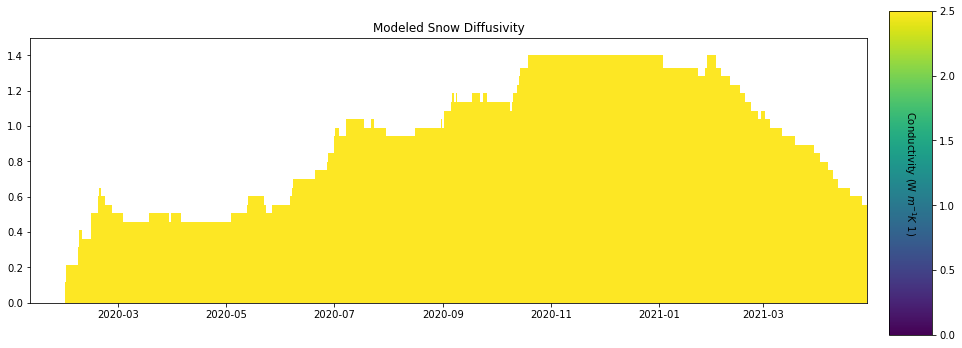

In [22]:
arr = extracted_temps.to_numpy(dtype = float)
arr = np.rot90(arr)
# Create your x-limits. Using two of your unix timestamps you first
# create a list of datetime.datetime objects using map.
x_lims = pd.to_datetime([res.index[0],res.index[-1]])

# You can then convert these datetime.datetime objects to the correct
# format for matplotlib to work with.
x_lims = mdates.date2num(x_lims)

f,ax = plt.subplots(1,1, figsize=(15,15))
sp = plt.imshow(arr, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmin = 0, vmax = 2.5)
plt.title('Modeled Snow Diffusivity')
plt.ylim(0, 1.5)
ax.xaxis_date()

# f.subplots_adjust(right=0.9)
cbar_ax = f.add_axes([0.92, 0.35, 0.04, 0.3])
cbar = f.colorbar(sp, cax=cbar_ax)
cbar.set_label('Conductivity (W $m^{-1} K ^ {1}$)', rotation=270, labelpad=-37)
#plt.savefig(os.path.join(fig_dir, 'meas_model_temp.png'), dpi = 300)

# densities

In [21]:
heights = np.linspace(0,140,29)
extracted_temps = pd.DataFrame(columns = heights, index = res.index)
for dt in tqdm(res.index):
    if not pd.isnull(res.loc[dt, 'densities']):
        model_heights = np.array([float(x) for x in res.loc[dt, 'heights'].split(',')[1:]])
        conductivities = np.array([float(x) for x in res.loc[dt, 'densities'].split(',')[1:]])
        for h in extracted_temps.columns:
            if h < model_heights[-1]+5:
                hdiff = float(h) - model_heights
                idx = (np.abs(hdiff - 0)).argmin()
                extracted_temps.loc[dt, h] = conductivities[idx]

100%|██████████| 4296/4296 [00:06<00:00, 656.55it/s] 


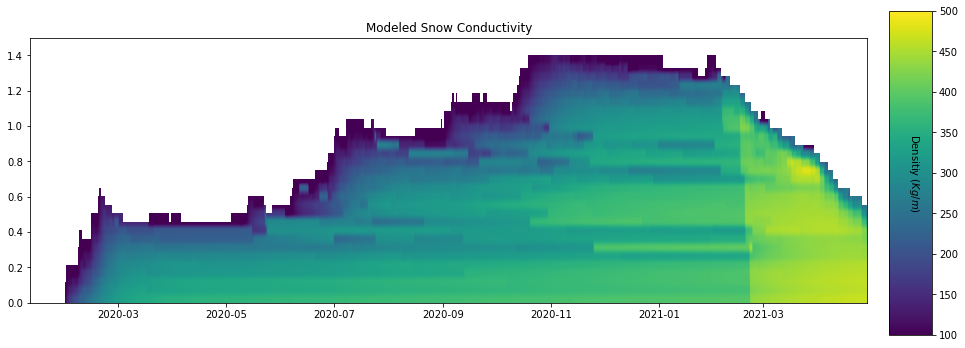

In [25]:
arr = extracted_temps.to_numpy(dtype = float)
arr = np.rot90(arr)
# Create your x-limits. Using two of your unix timestamps you first
# create a list of datetime.datetime objects using map.
x_lims = pd.to_datetime([res.index[0],res.index[-1]])

# You can then convert these datetime.datetime objects to the correct
# format for matplotlib to work with.
x_lims = mdates.date2num(x_lims)

f,ax = plt.subplots(1,1, figsize=(15,15))
sp = plt.imshow(arr, aspect = 100, extent = (x_lims[0], x_lims[1],0,1.4), vmin = 100, vmax = 500)
plt.title('Modeled Snow Conductivity')
plt.ylim(0, 1.5)
ax.xaxis_date()

# f.subplots_adjust(right=0.9)
cbar_ax = f.add_axes([0.92, 0.35, 0.04, 0.3])
cbar = f.colorbar(sp, cax=cbar_ax)
cbar.set_label('Densitiy ($Kg / m$)', rotation=270, labelpad=-37)
#plt.savefig(os.path.join(fig_dir, 'meas_model_temp.png'), dpi = 300)